In [1]:
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10



# Load model1 and model2
model1 = load_model('model1_6506021411051.h5')

model1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                                 
Total params: 1746506 (6.66 MB)
Trainable params: 174650

In [2]:
model2 = load_model('model2_6506021411051.h5')

# Display model summary
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)        

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Evaluate model1 on training and testing data
train_accuracy1 = model1.evaluate(x_train, y_train, verbose=0)[1]
test_accuracy1 = model1.evaluate(x_test, y_test, verbose=0)[1]

# Evaluate model2 on training and testing data
train_accuracy2 = model2.evaluate(x_train, y_train, verbose=0)[1]
test_accuracy2 = model2.evaluate(x_test, y_test, verbose=0)[1]

# Compare training and testing accuracy
print("Model 1 - Training Accuracy:", train_accuracy1)
print("Model 1 - Testing Accuracy:", test_accuracy1)
print("Model 2 - Training Accuracy:", train_accuracy2)
print("Model 2 - Testing Accuracy:", test_accuracy2)


Model 1 - Training Accuracy: 0.6906999945640564
Model 1 - Testing Accuracy: 0.4684999883174896
Model 2 - Training Accuracy: 0.9337800145149231
Model 2 - Testing Accuracy: 0.6679999828338623


16/16 [==============================] - 0s 3ms/step


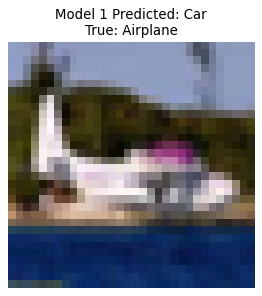

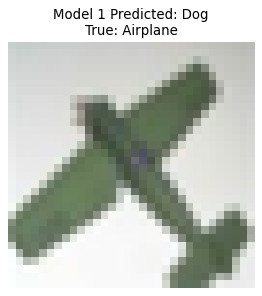

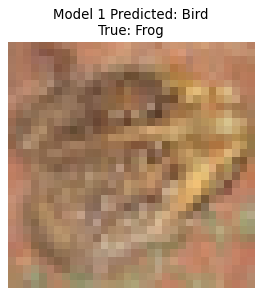

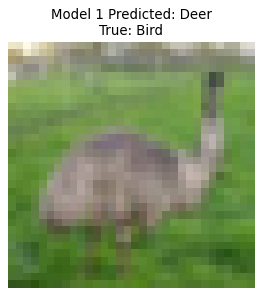

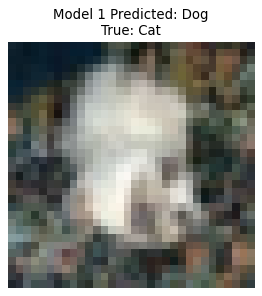

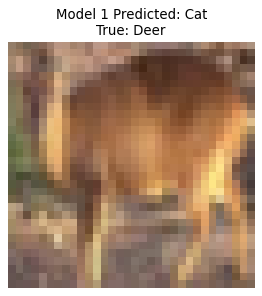

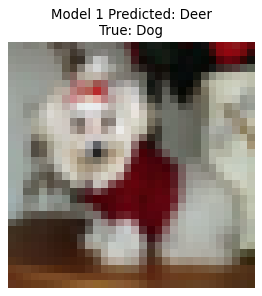

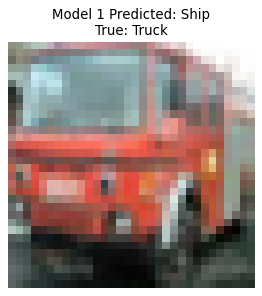

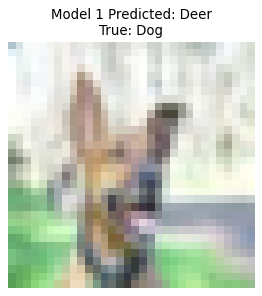

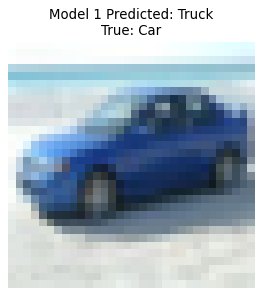

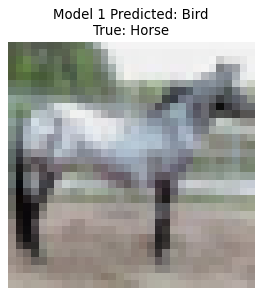

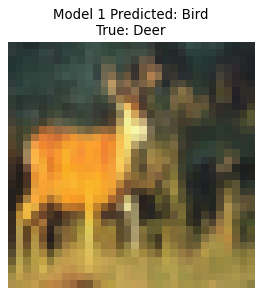

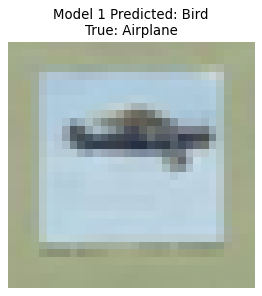

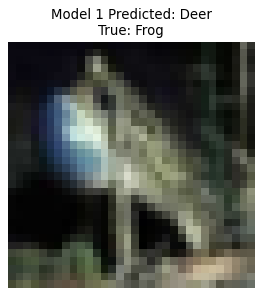

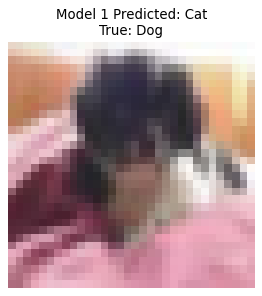

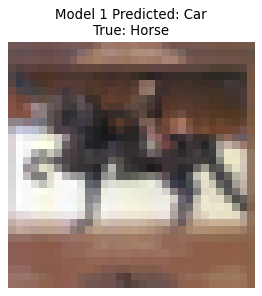

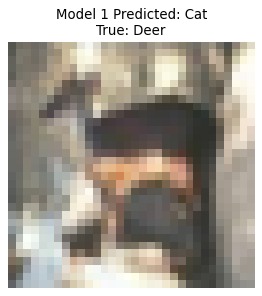

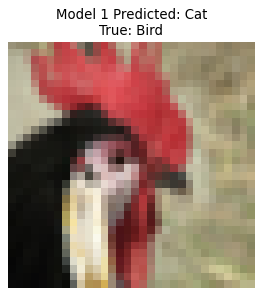

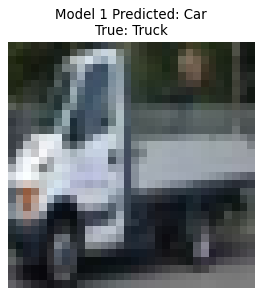

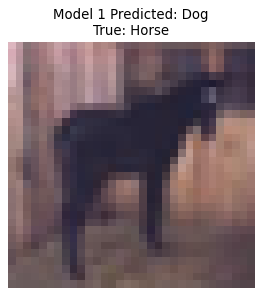

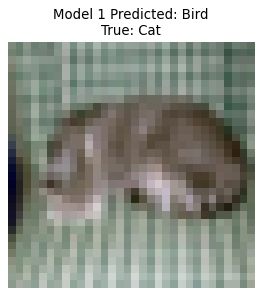

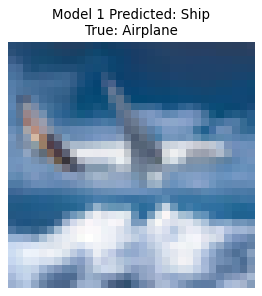

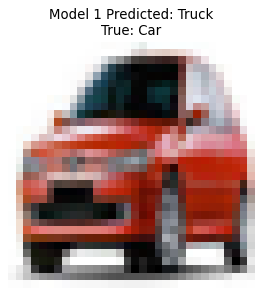

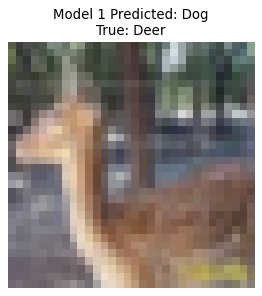

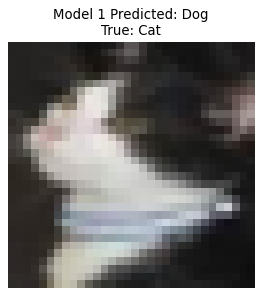

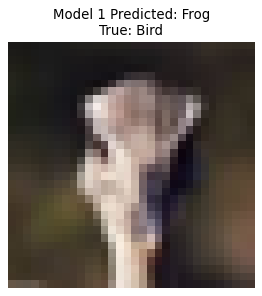

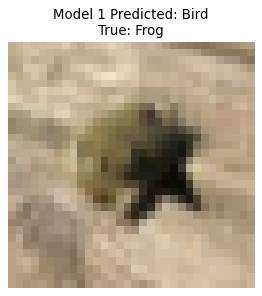

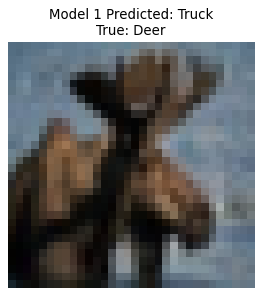

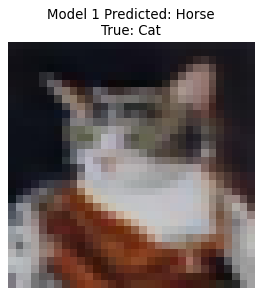

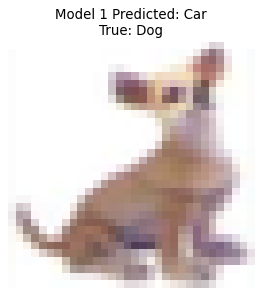

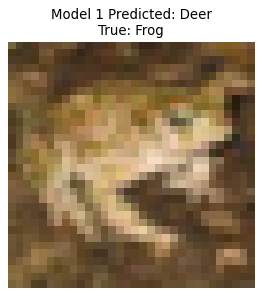

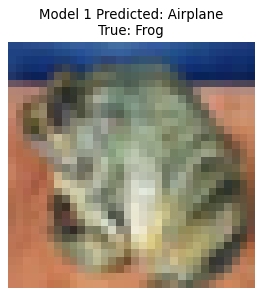

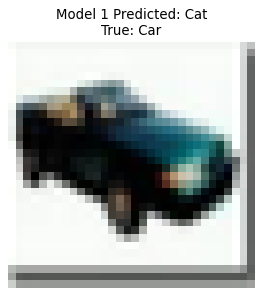

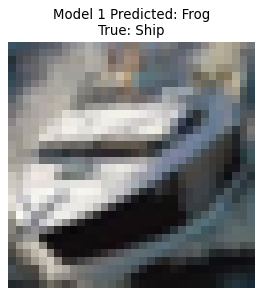

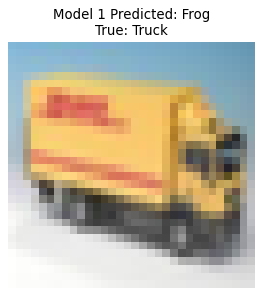

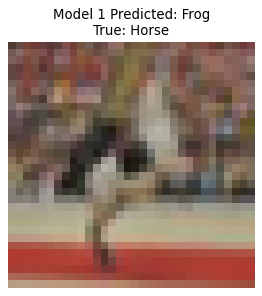

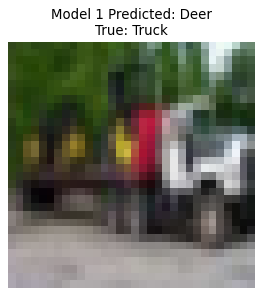

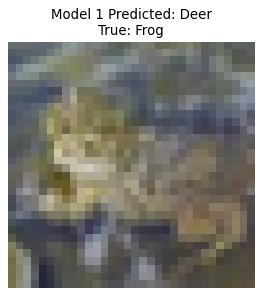

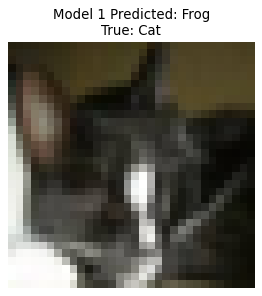

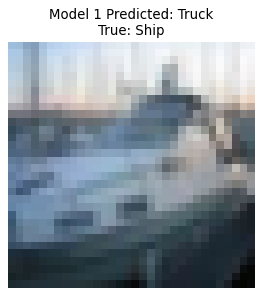

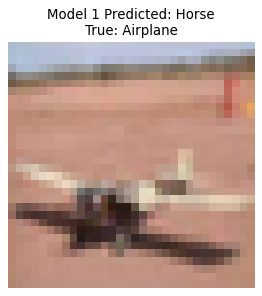

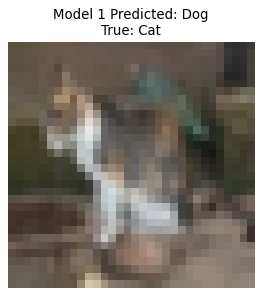

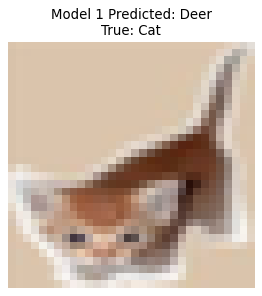

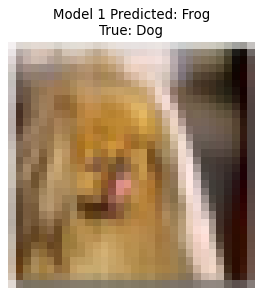

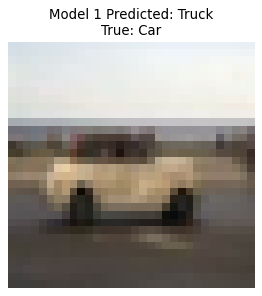

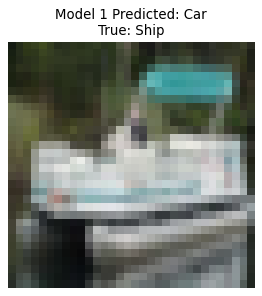

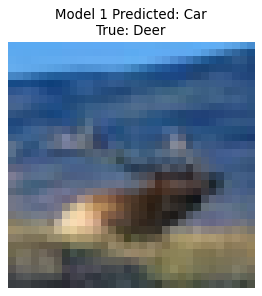

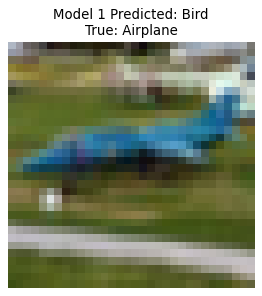

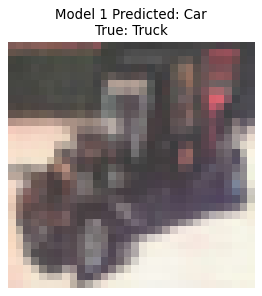

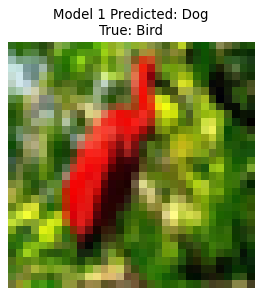

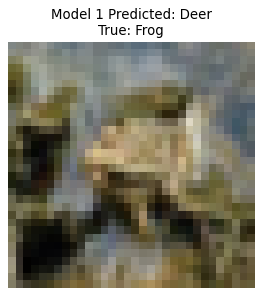

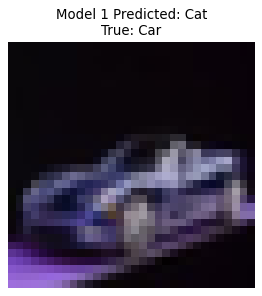

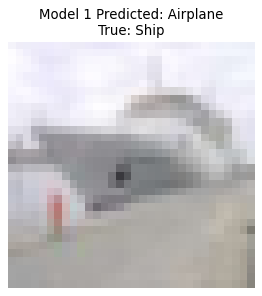

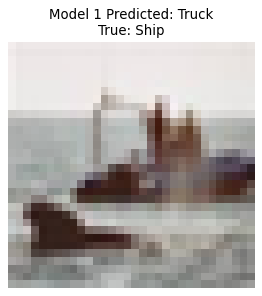

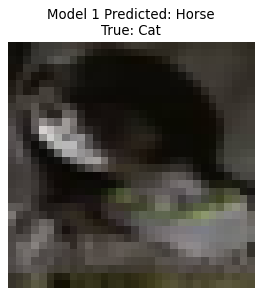

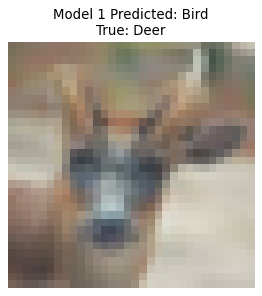

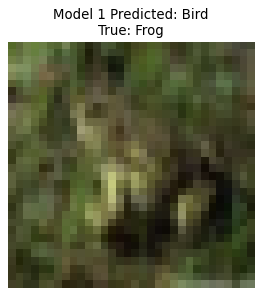

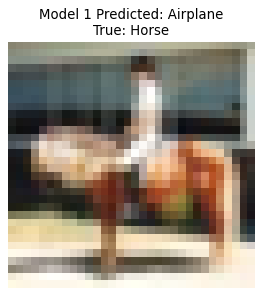

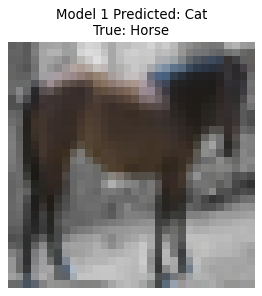

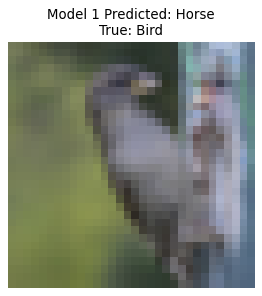

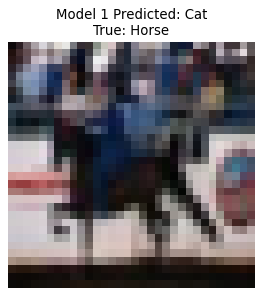

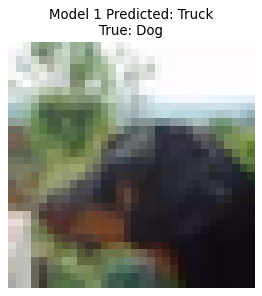

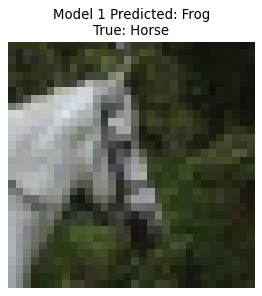

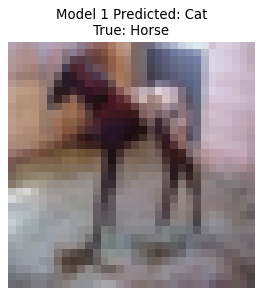

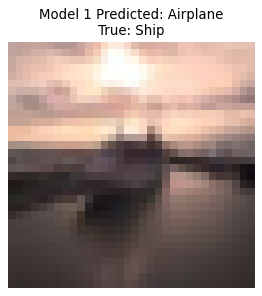

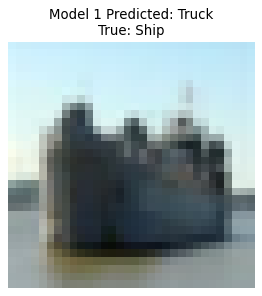

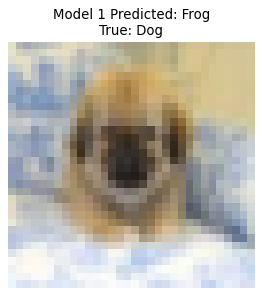

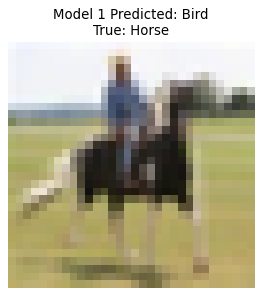

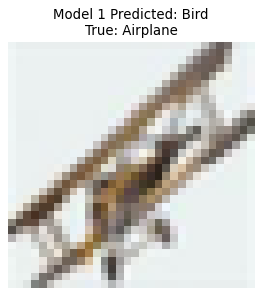

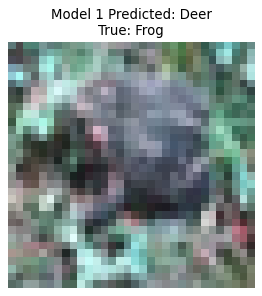

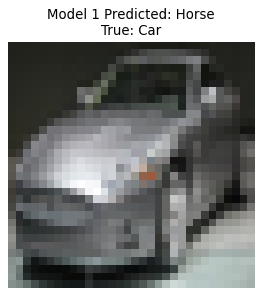

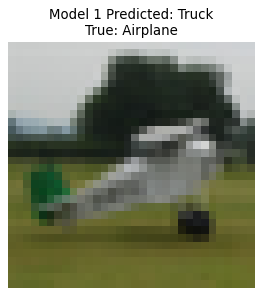

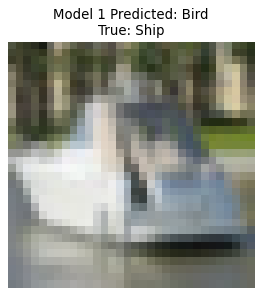

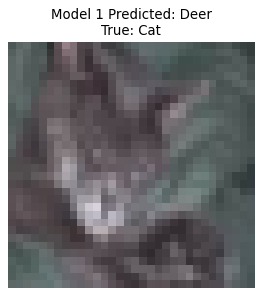

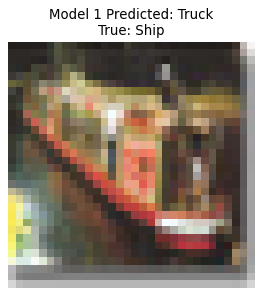

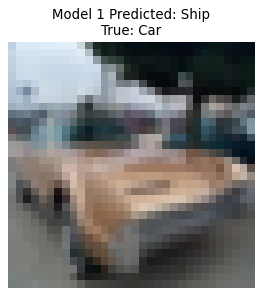

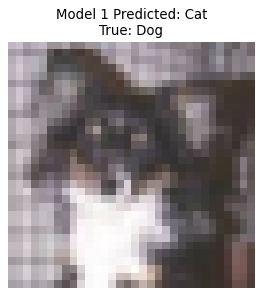

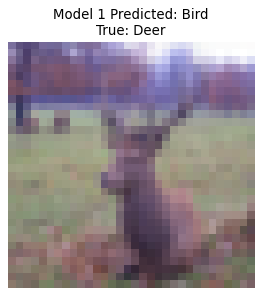

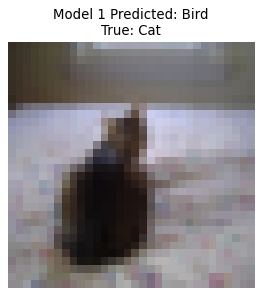

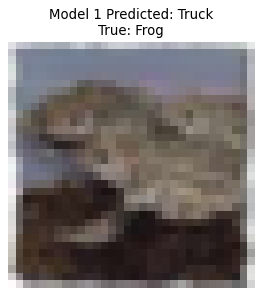

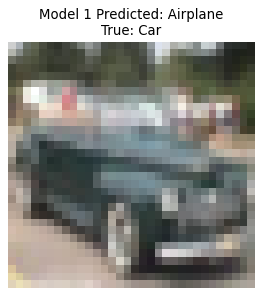

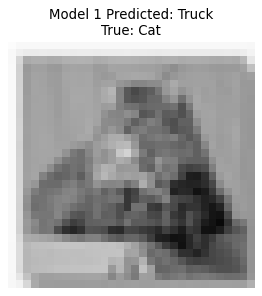

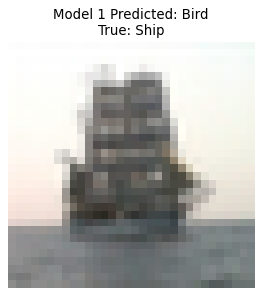

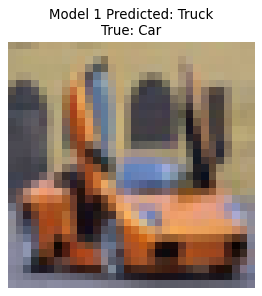

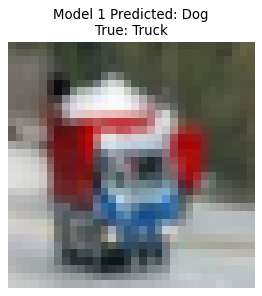

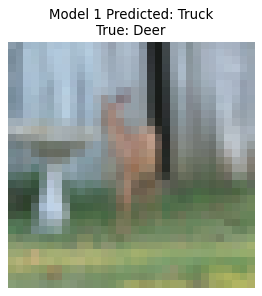

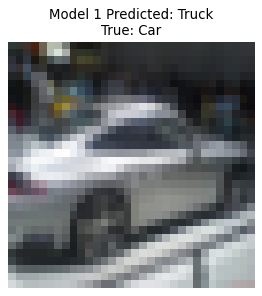

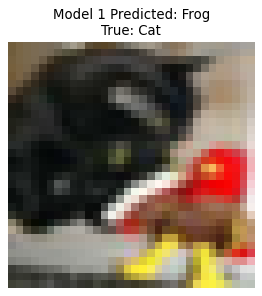

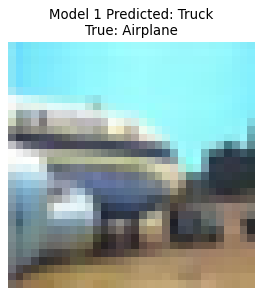

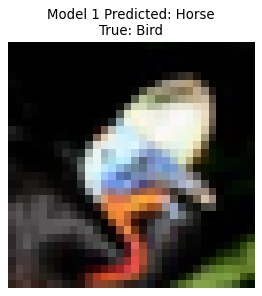

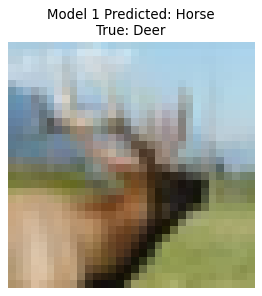

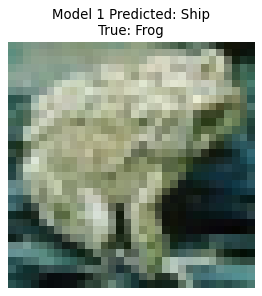

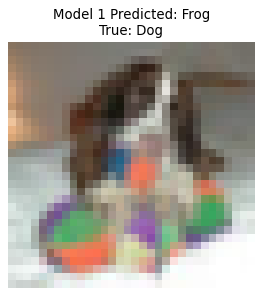

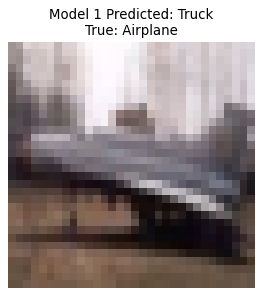

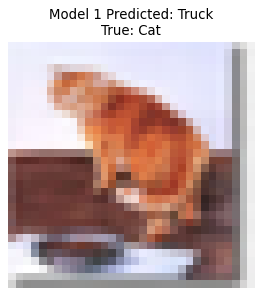

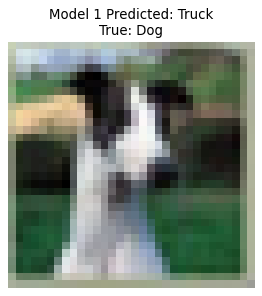

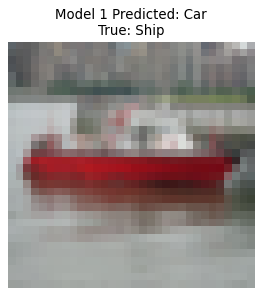

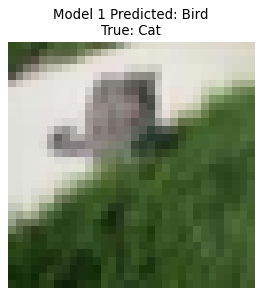

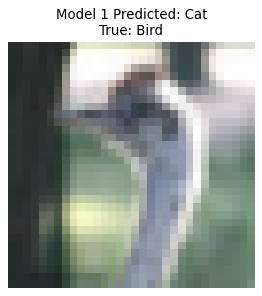

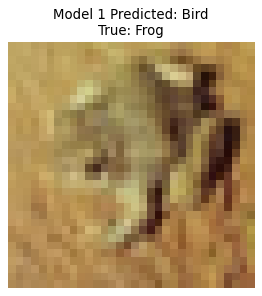

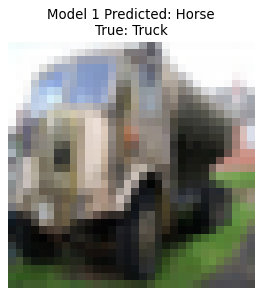

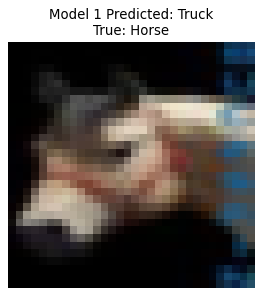

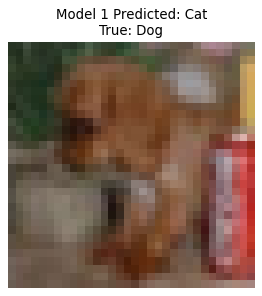

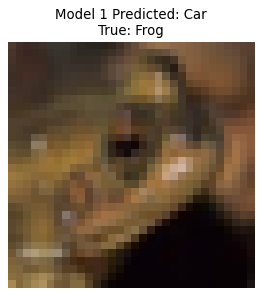

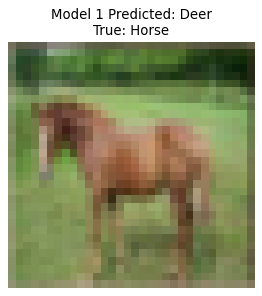

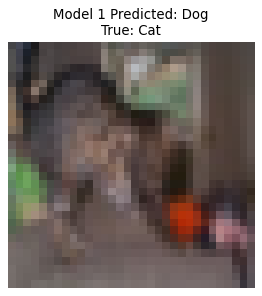

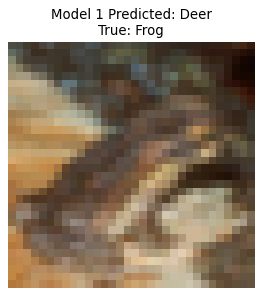

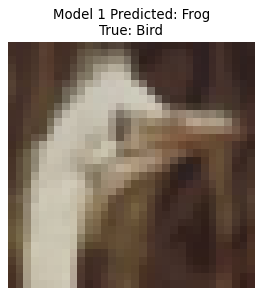

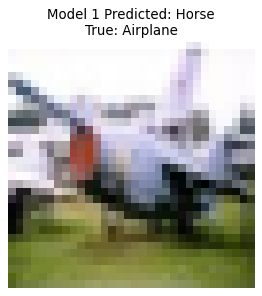

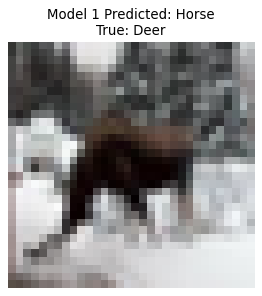

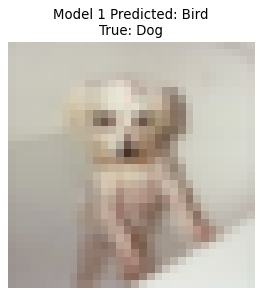

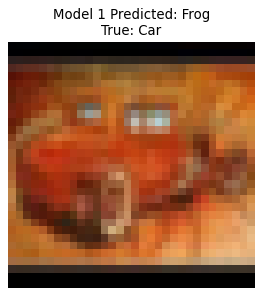

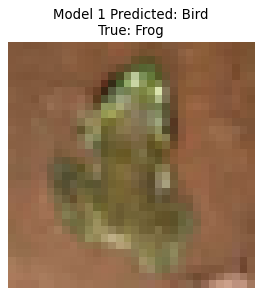

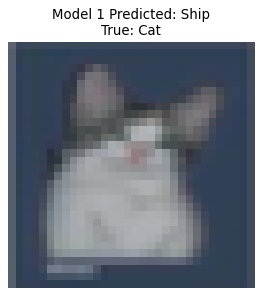

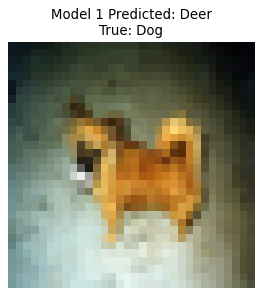

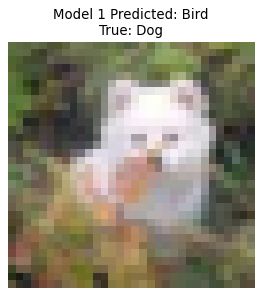

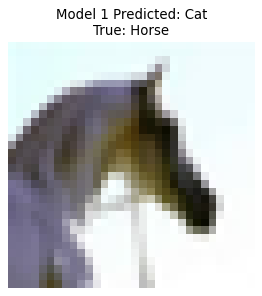

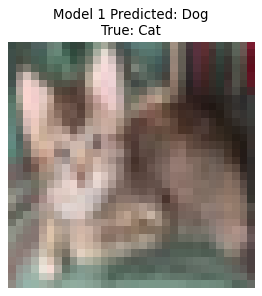

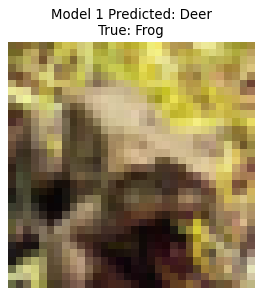

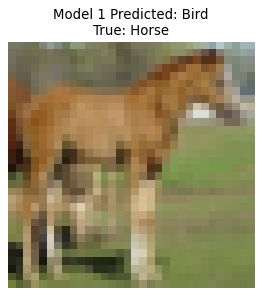

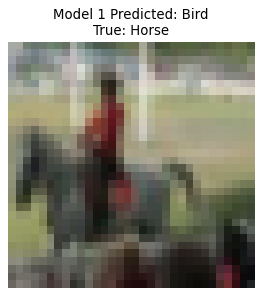

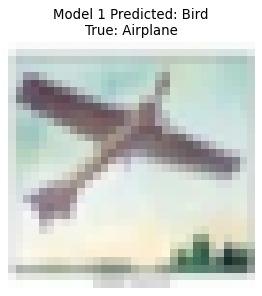

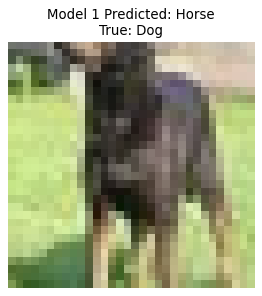

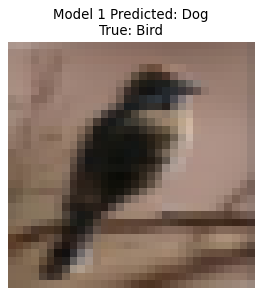

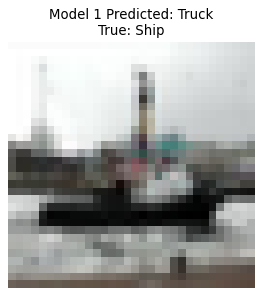

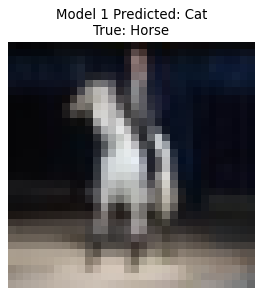

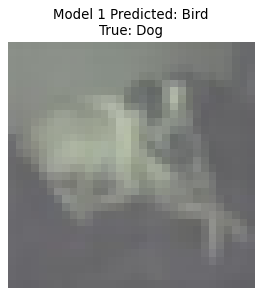

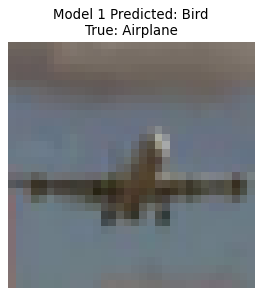

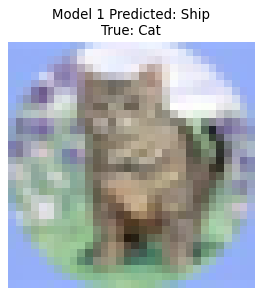

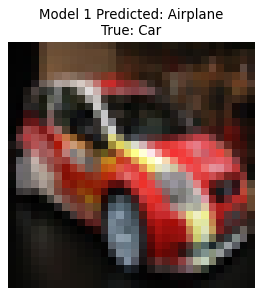

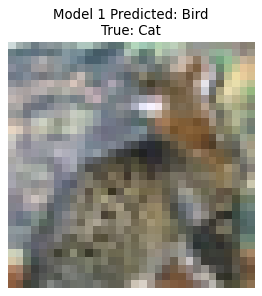

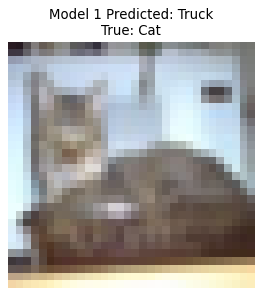

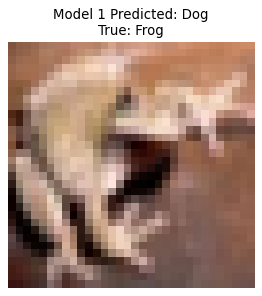

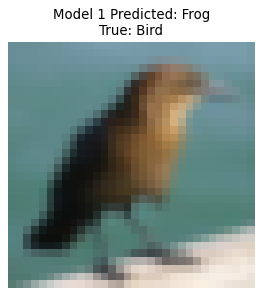

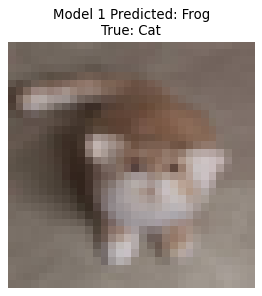

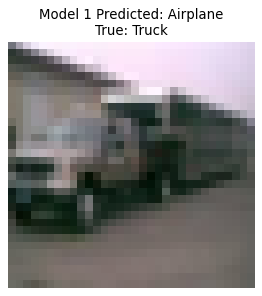

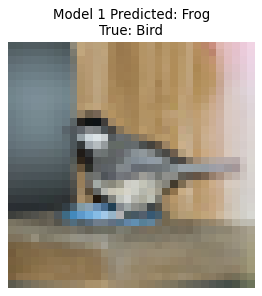

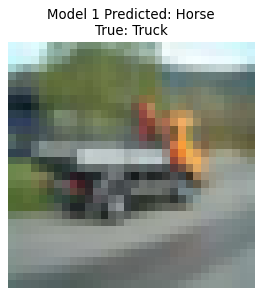

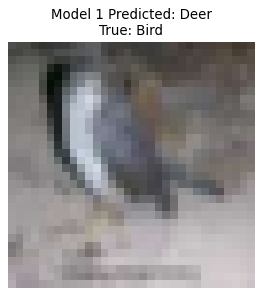

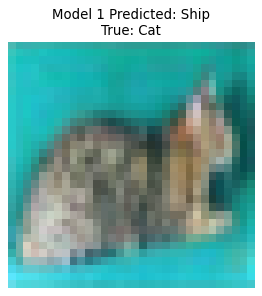

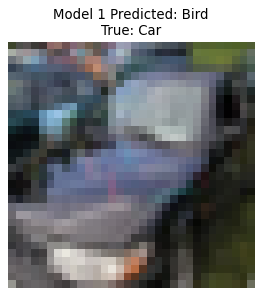

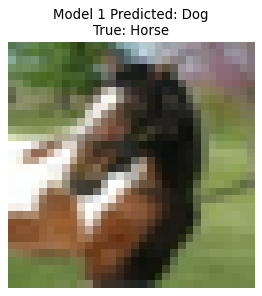

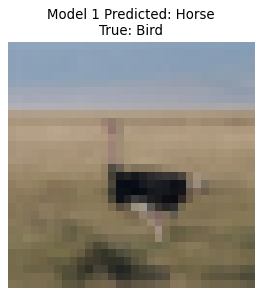

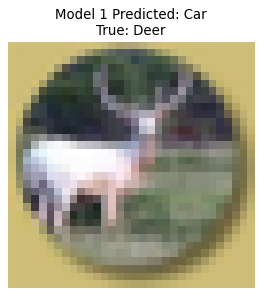

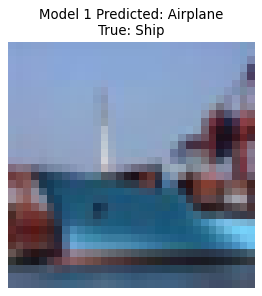

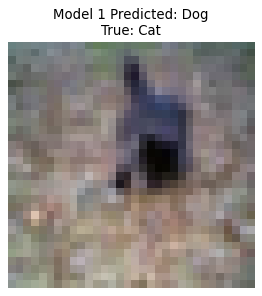

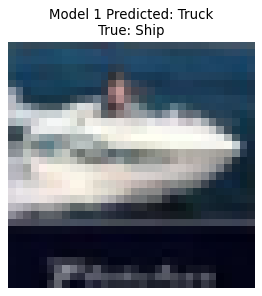

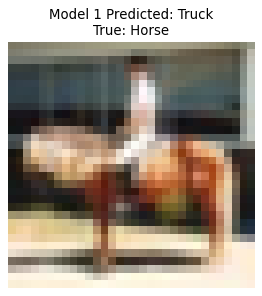

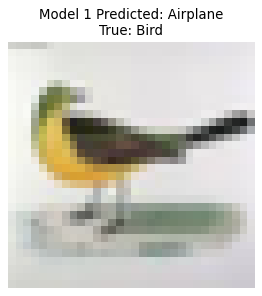

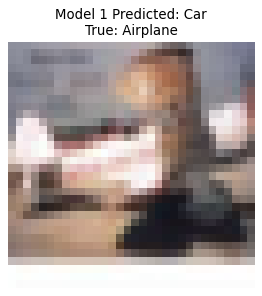

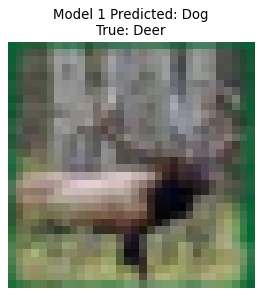

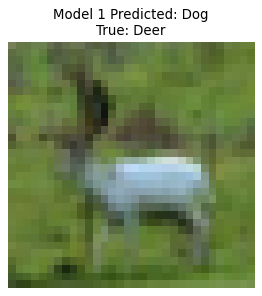

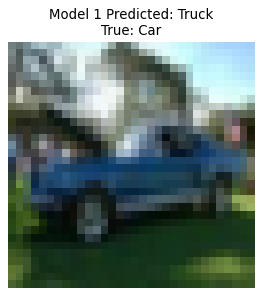

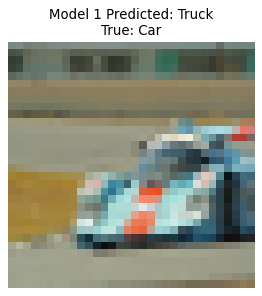

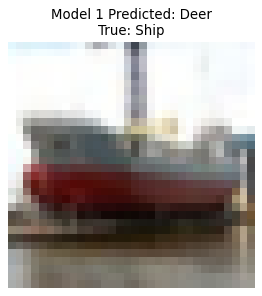

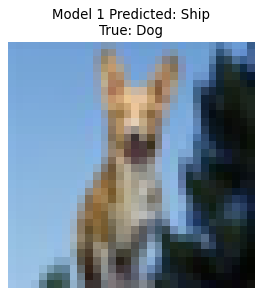

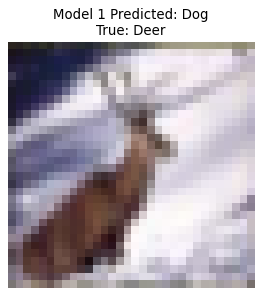

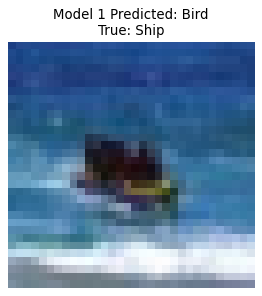

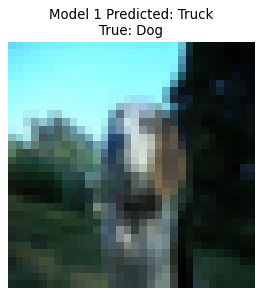

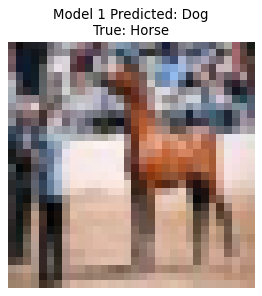

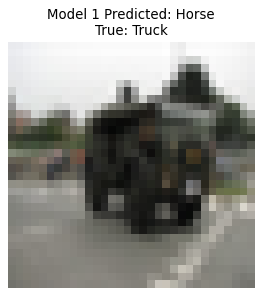

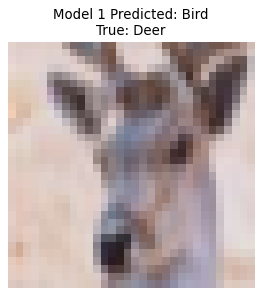

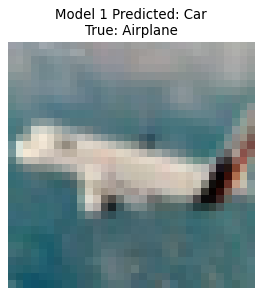

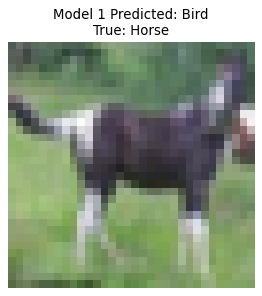

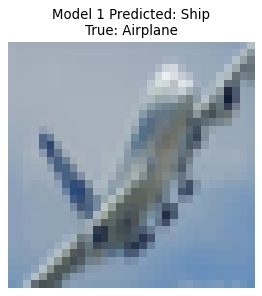

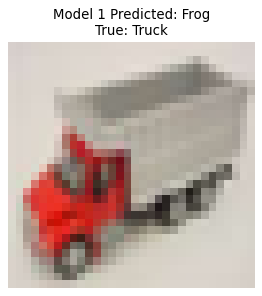

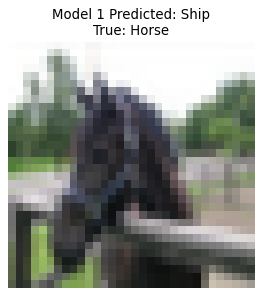

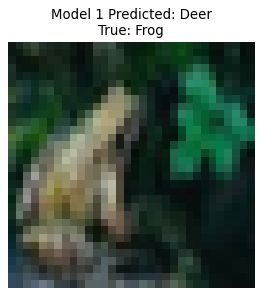

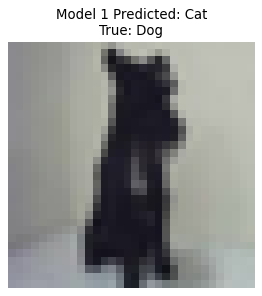

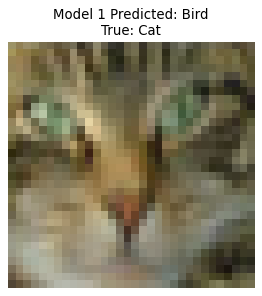

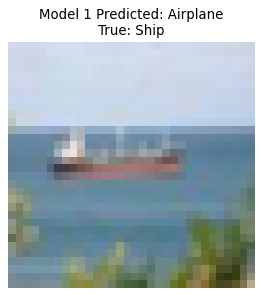

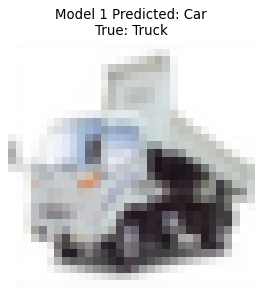

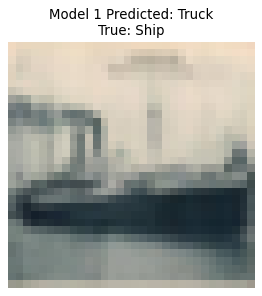

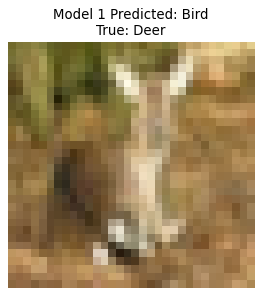

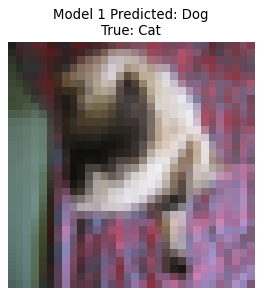

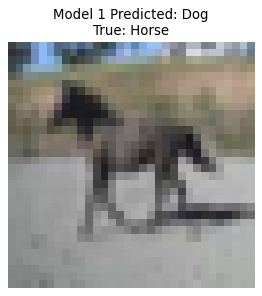

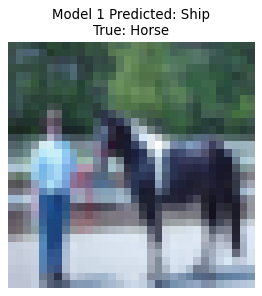

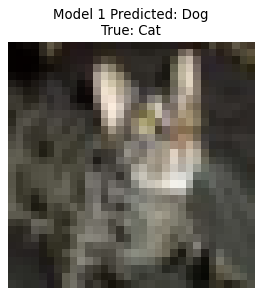

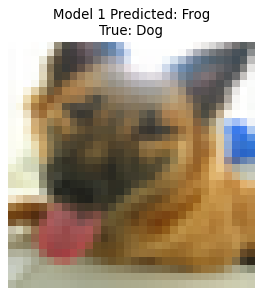

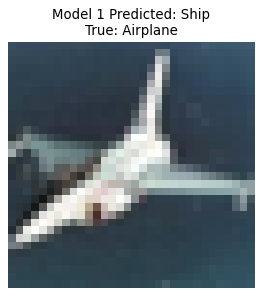

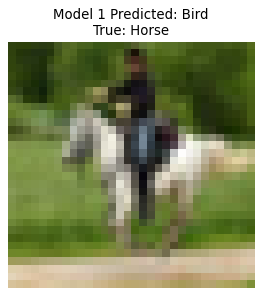

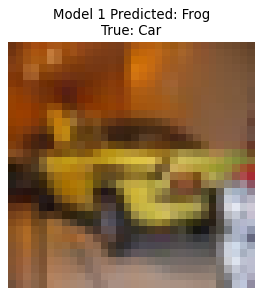

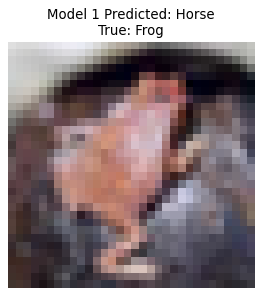

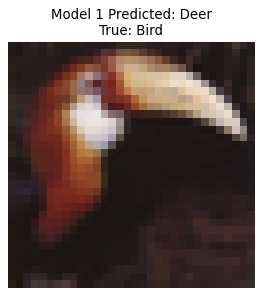

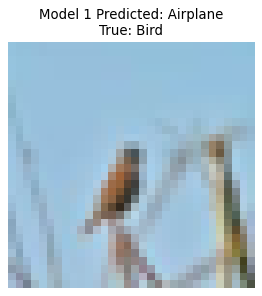

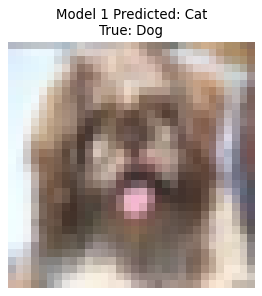

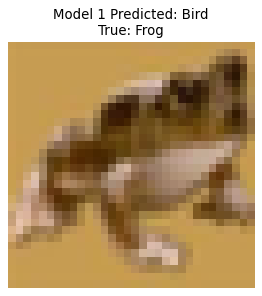

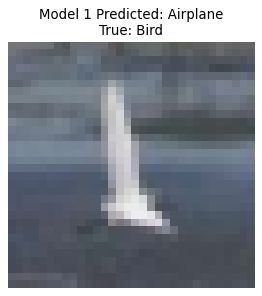

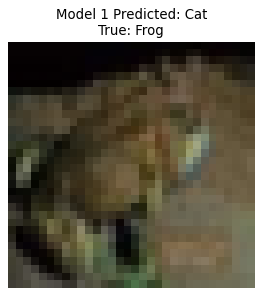

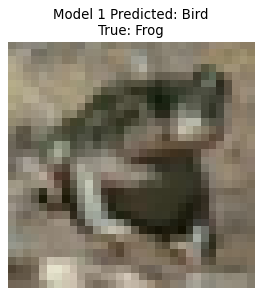

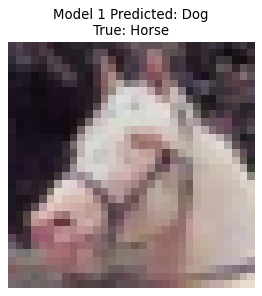

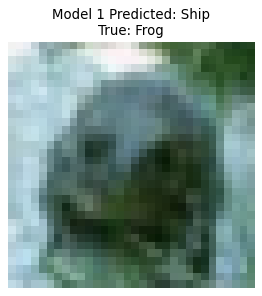

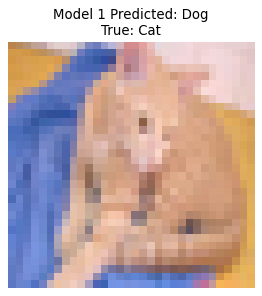

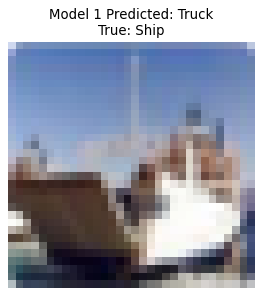

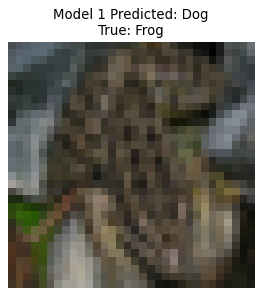

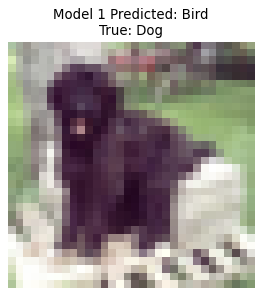

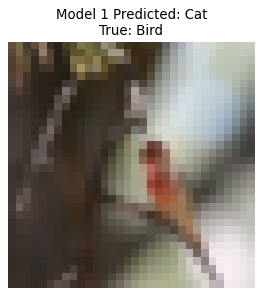

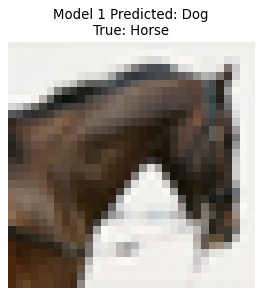

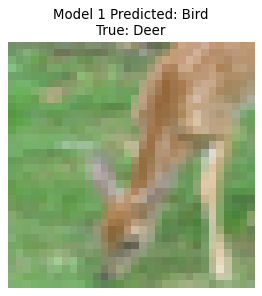

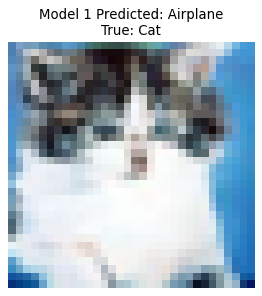

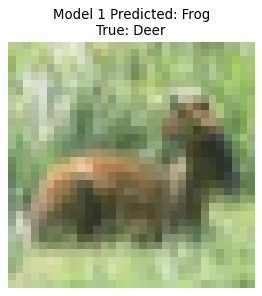

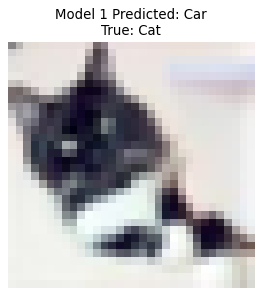

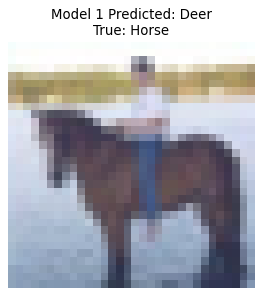

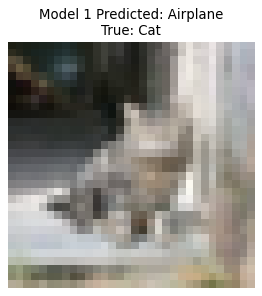

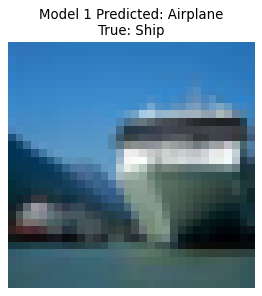

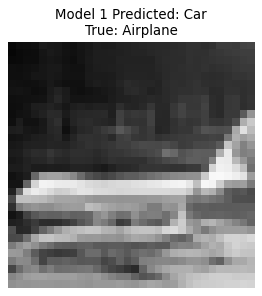

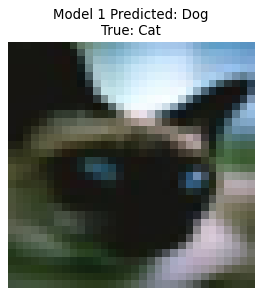

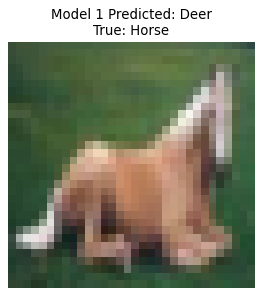

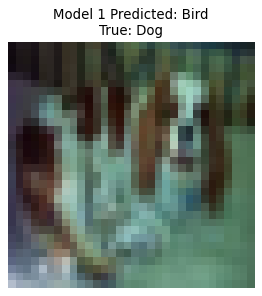

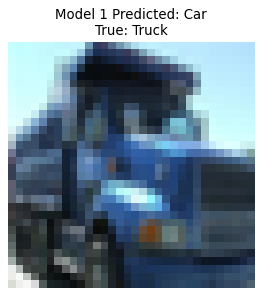

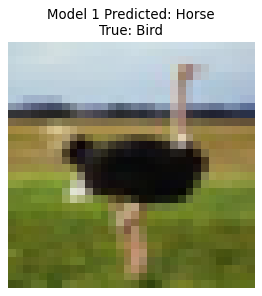

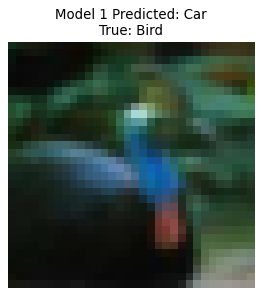

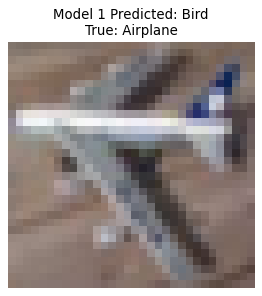

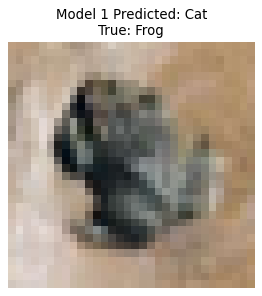

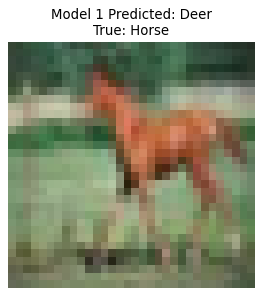

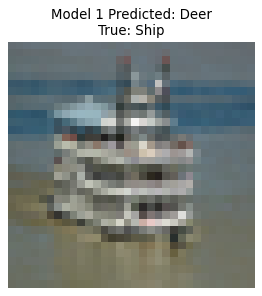

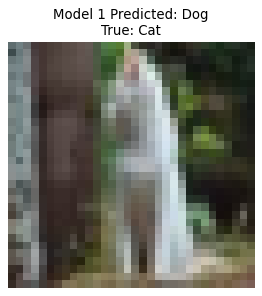

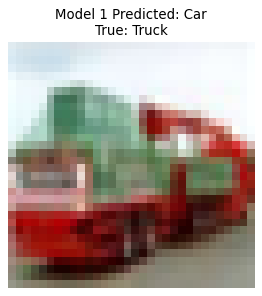

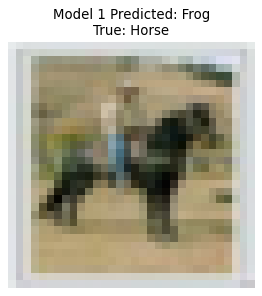

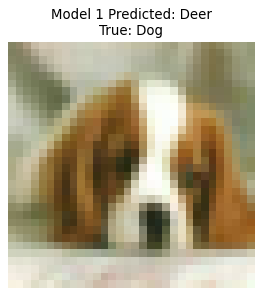

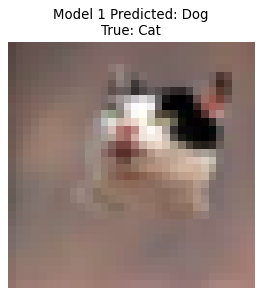

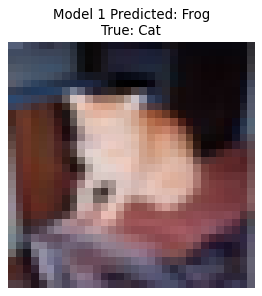

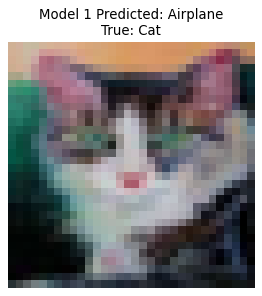

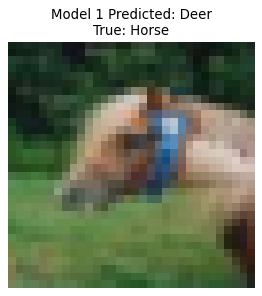

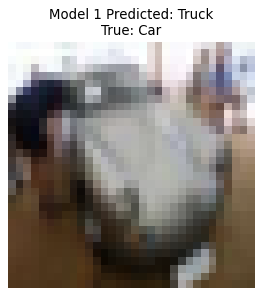

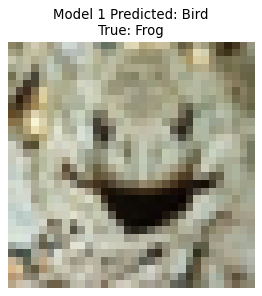

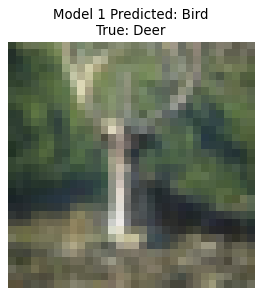

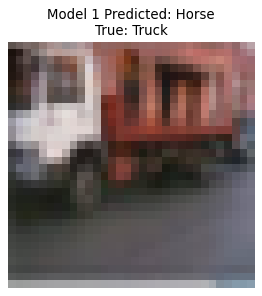

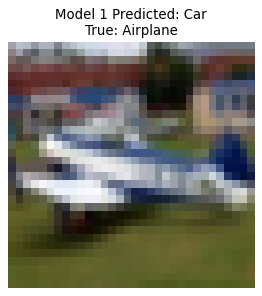

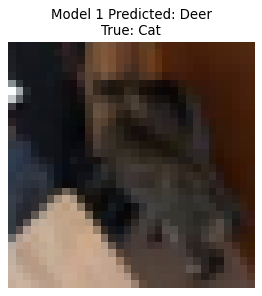

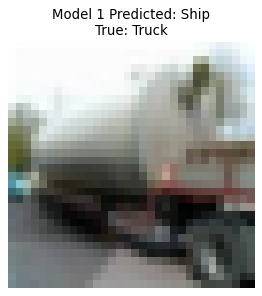

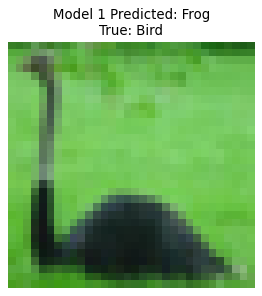

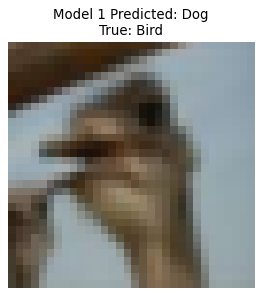

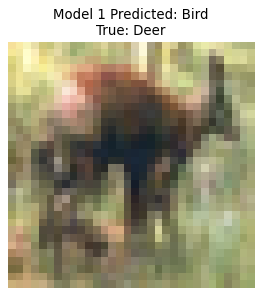

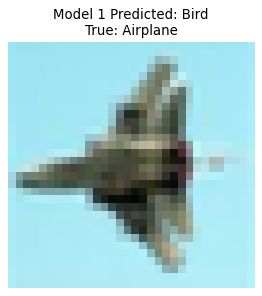

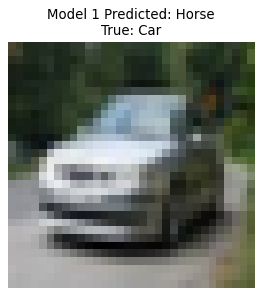

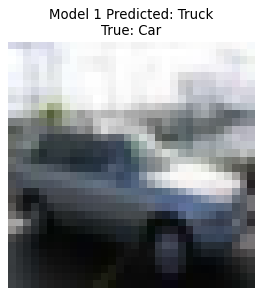

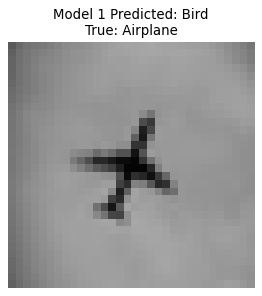

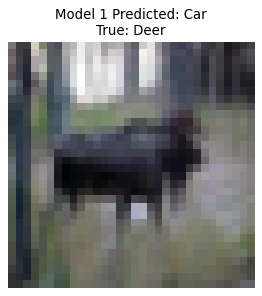

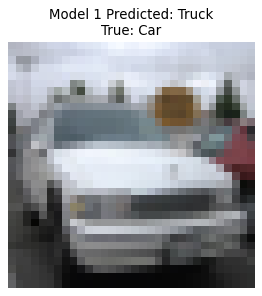

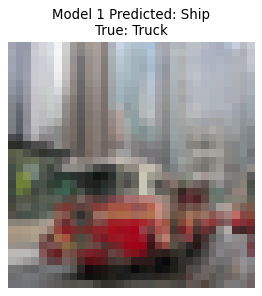

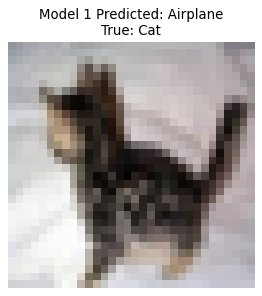

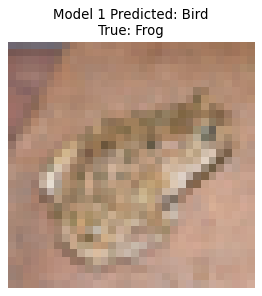

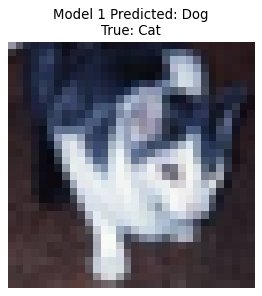

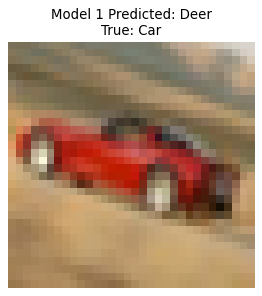

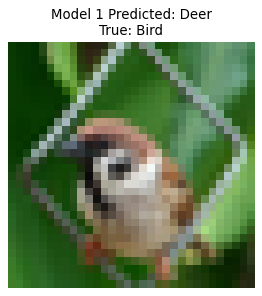

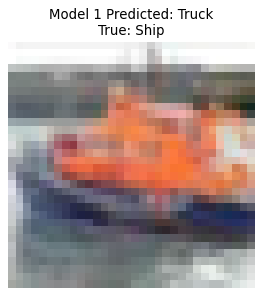

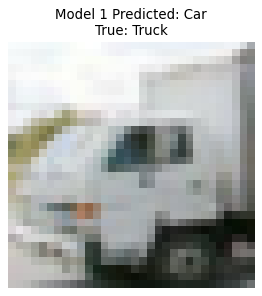

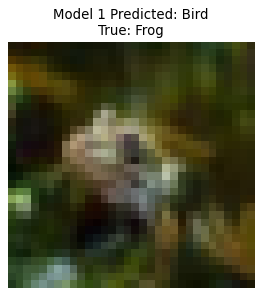

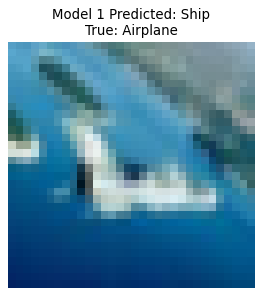

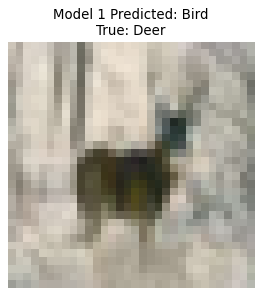

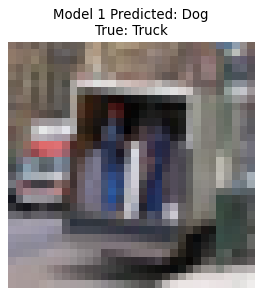

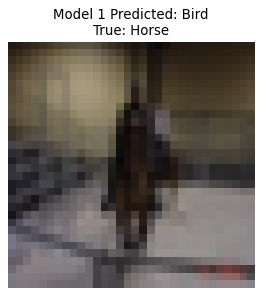

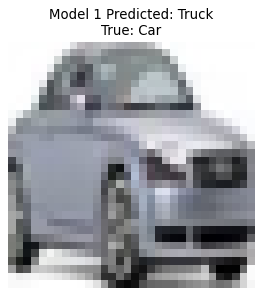

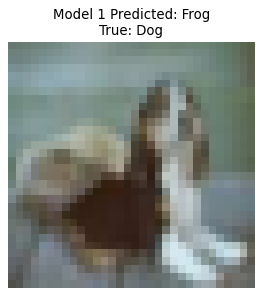

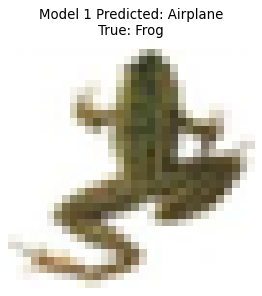

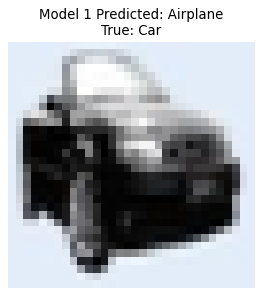

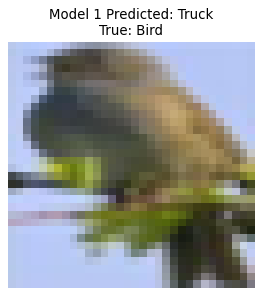

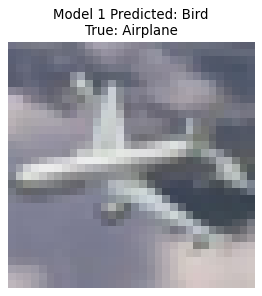

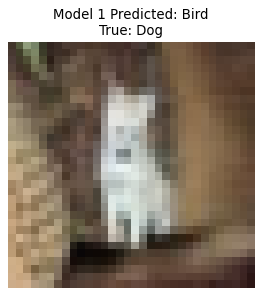

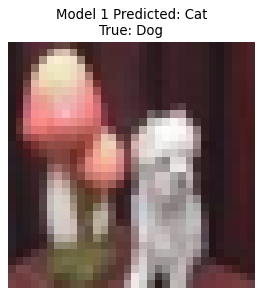

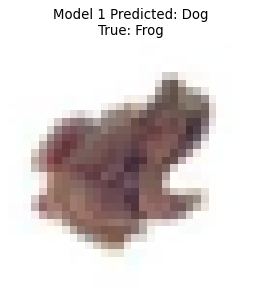

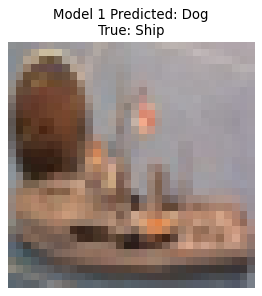

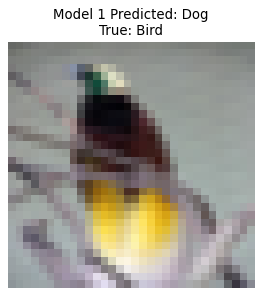

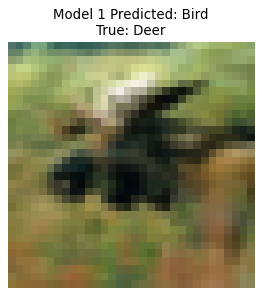

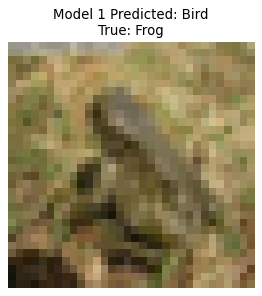

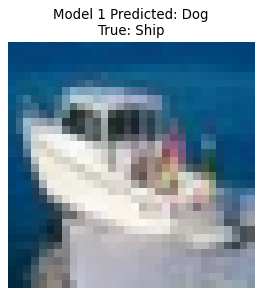

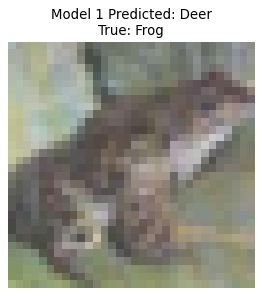

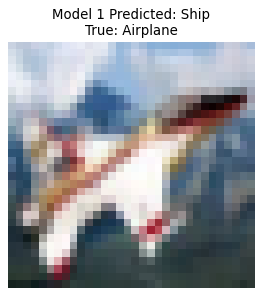

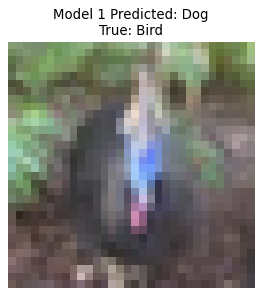

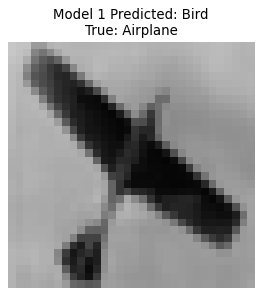

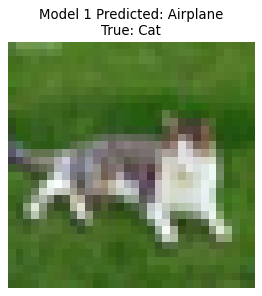

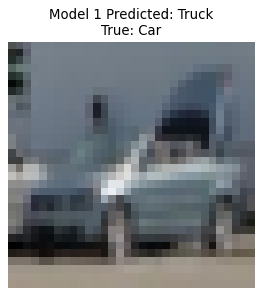

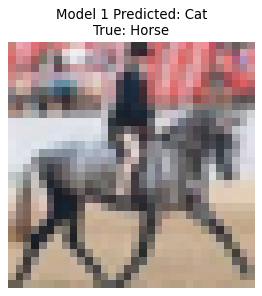

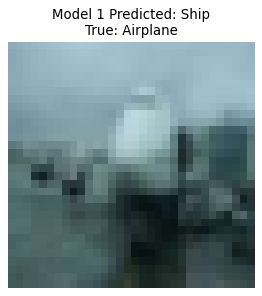

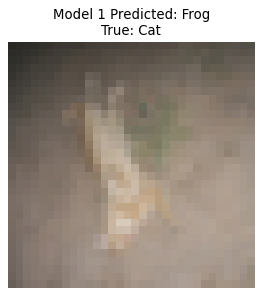

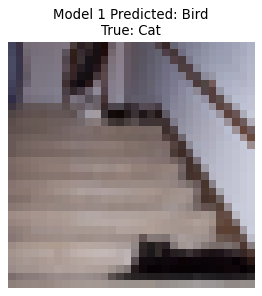

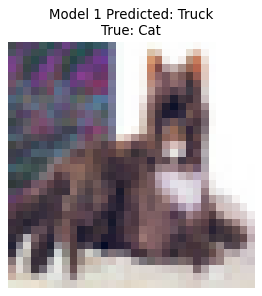

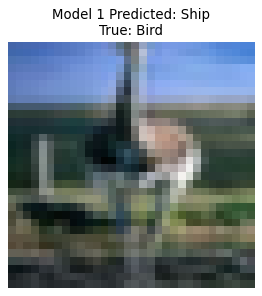

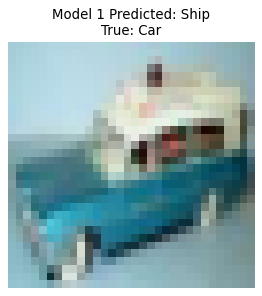

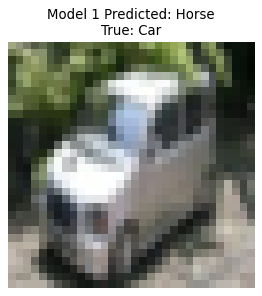

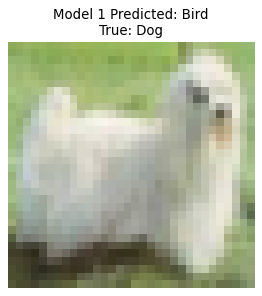

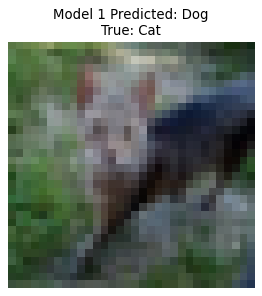

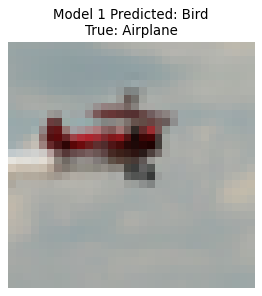

Incorrect predictions on random test data (Model 1): 284/500
Accuracy on random test data (Model 1): 43.20%
16/16 [==============================] - 0s 9ms/step


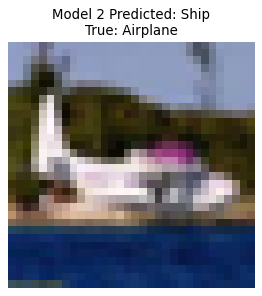

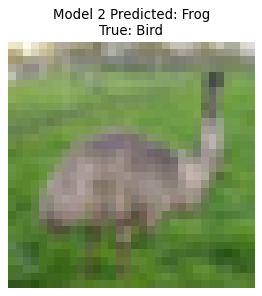

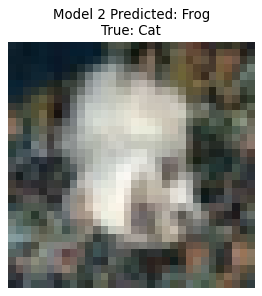

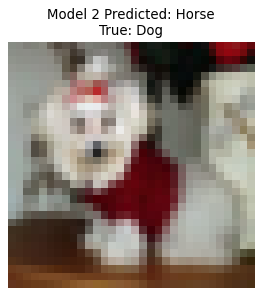

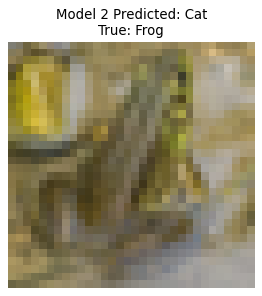

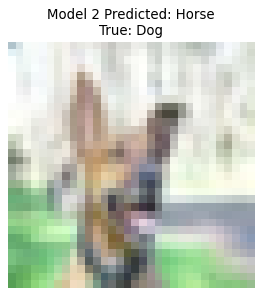

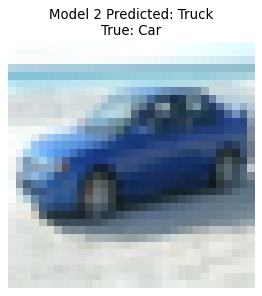

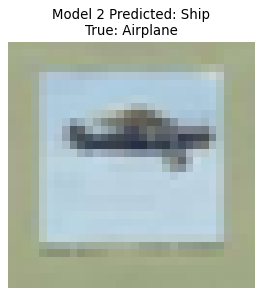

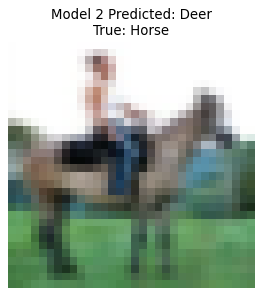

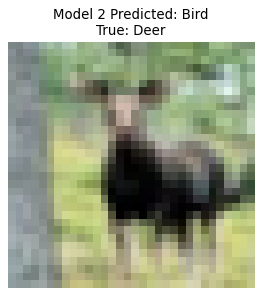

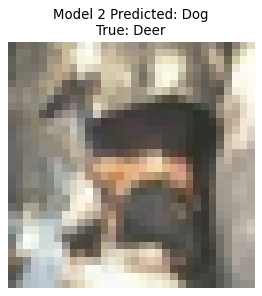

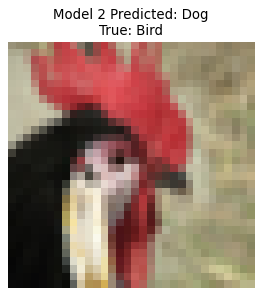

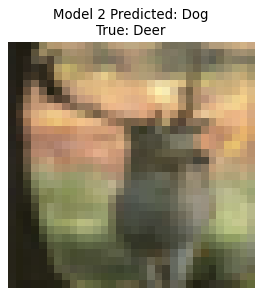

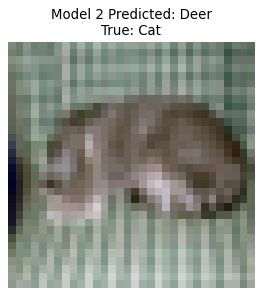

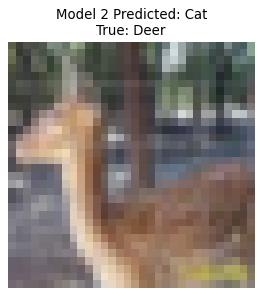

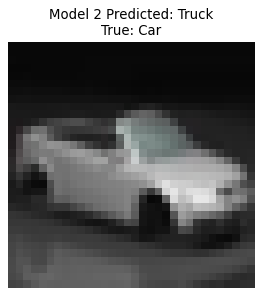

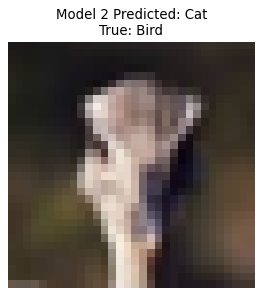

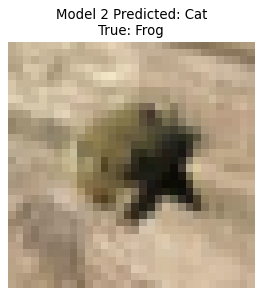

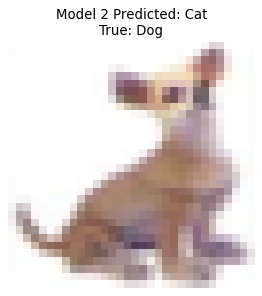

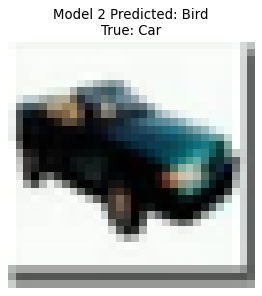

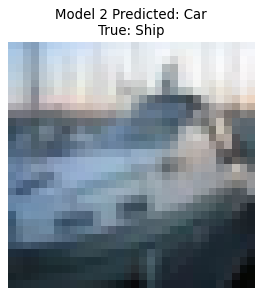

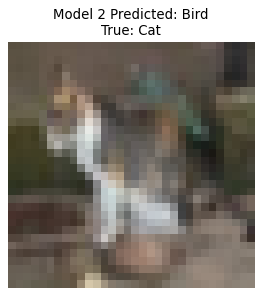

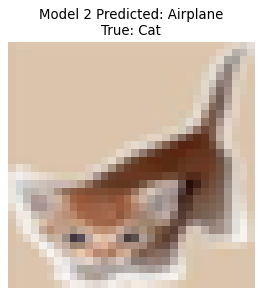

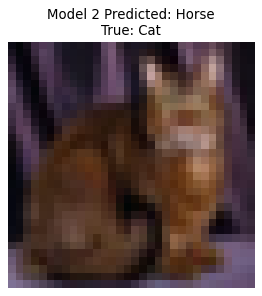

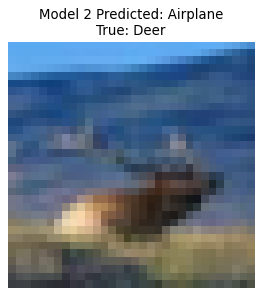

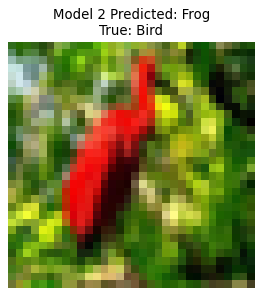

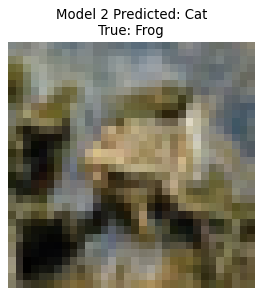

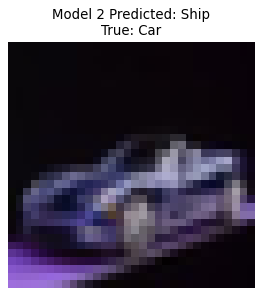

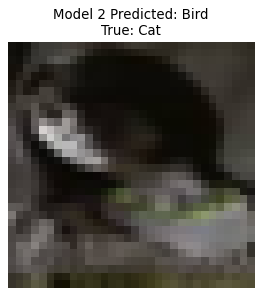

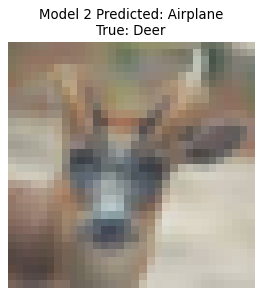

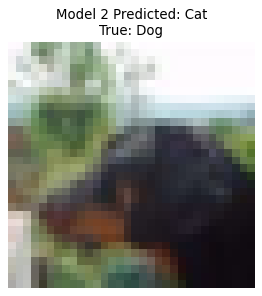

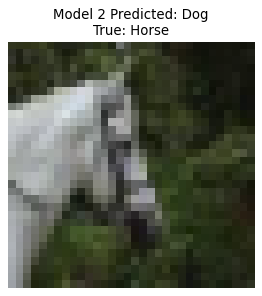

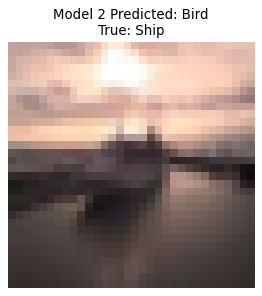

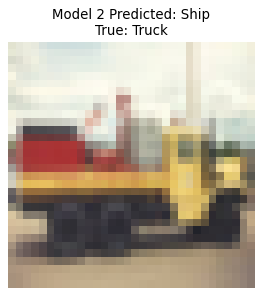

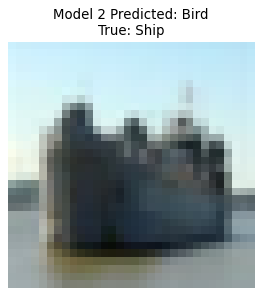

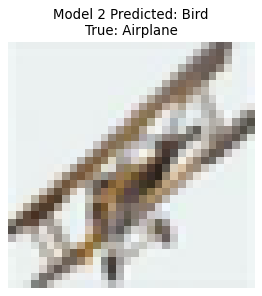

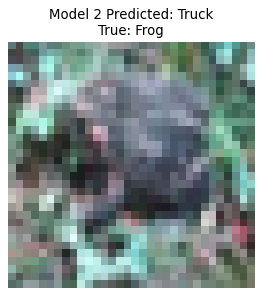

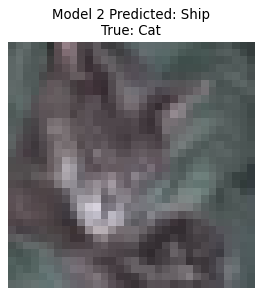

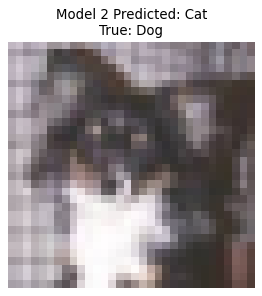

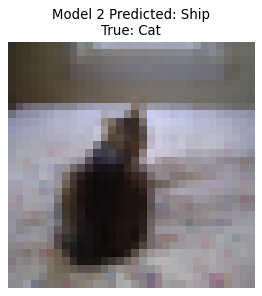

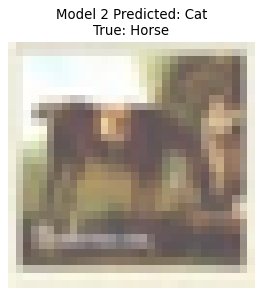

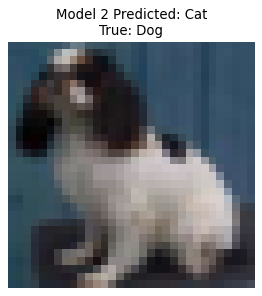

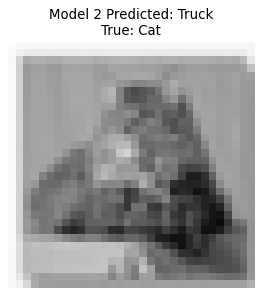

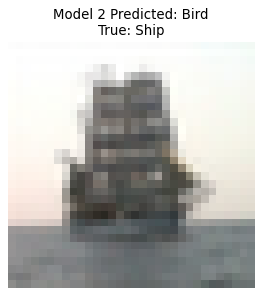

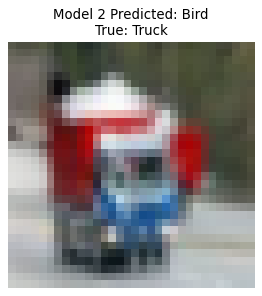

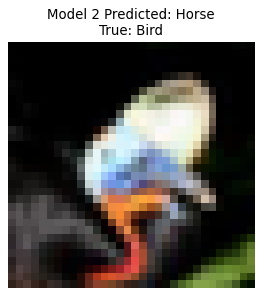

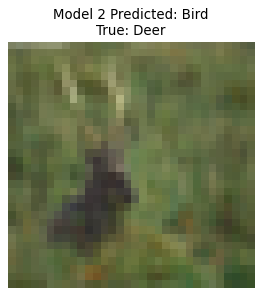

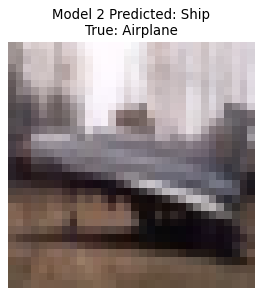

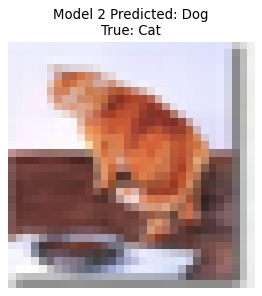

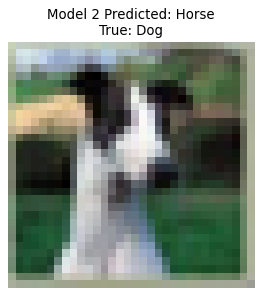

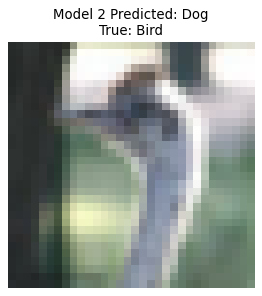

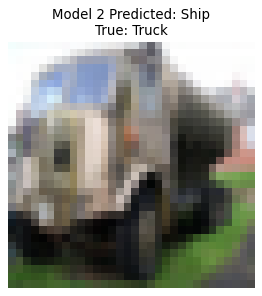

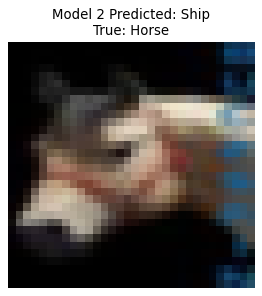

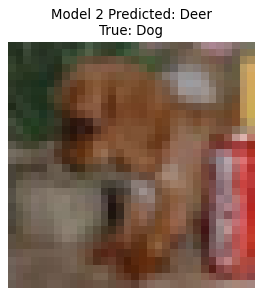

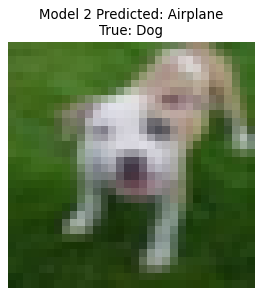

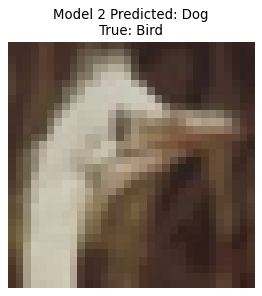

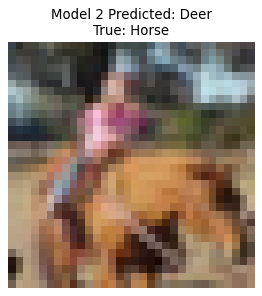

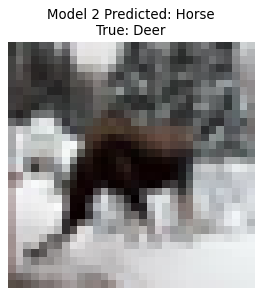

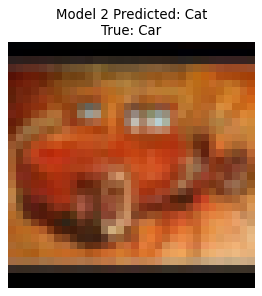

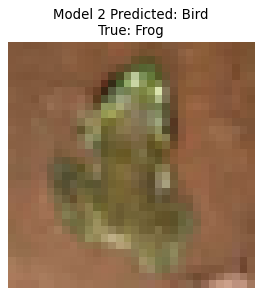

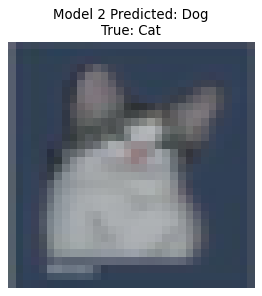

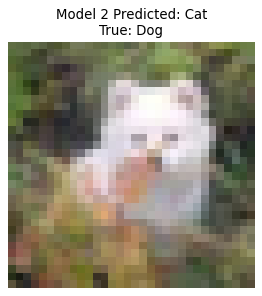

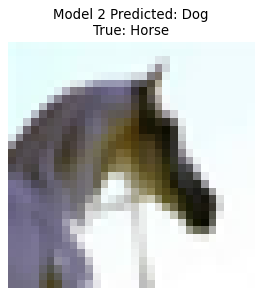

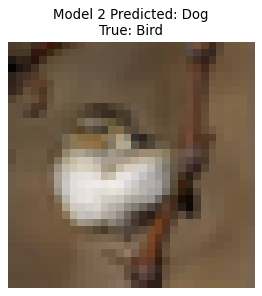

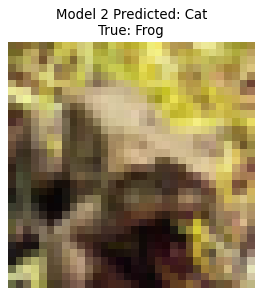

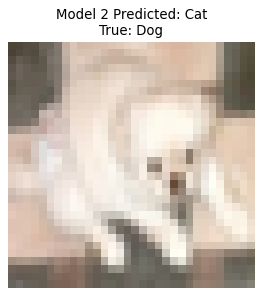

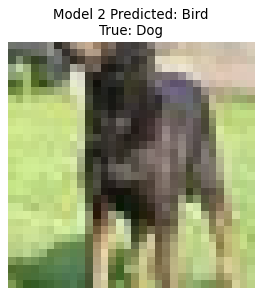

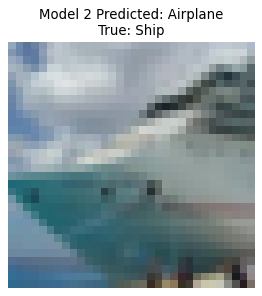

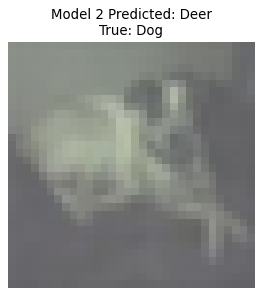

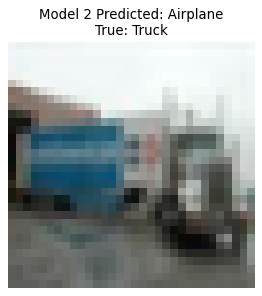

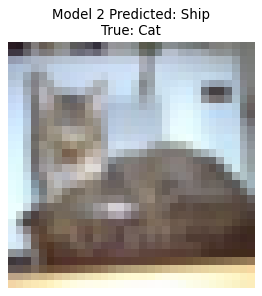

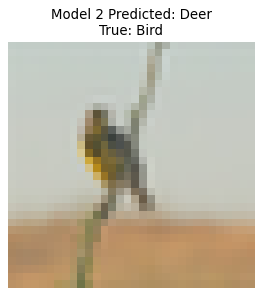

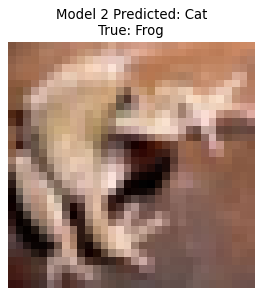

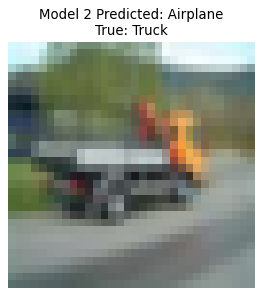

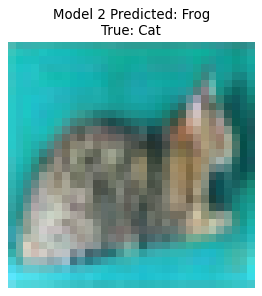

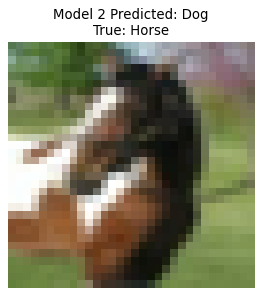

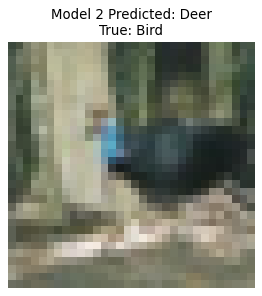

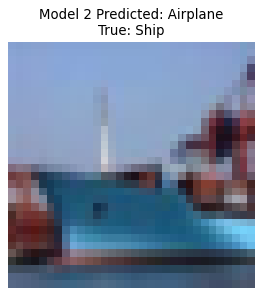

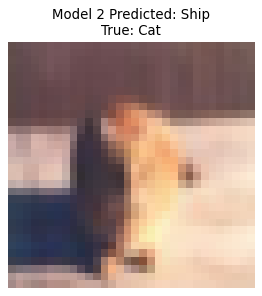

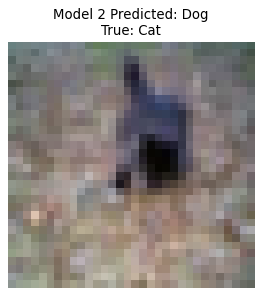

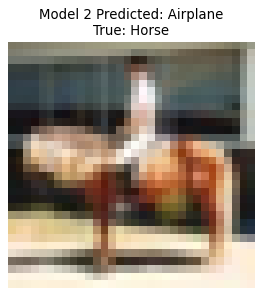

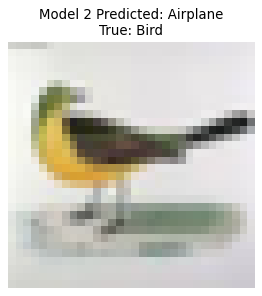

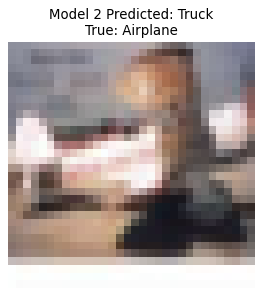

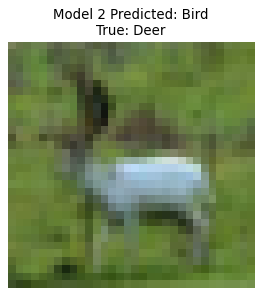

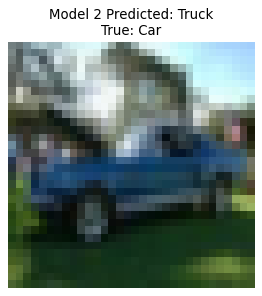

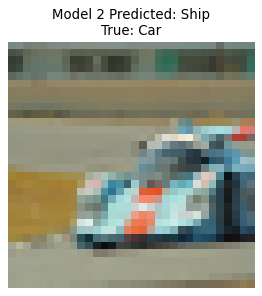

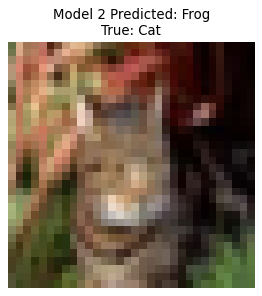

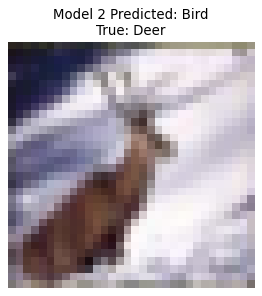

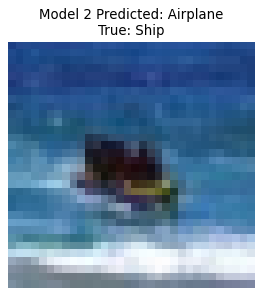

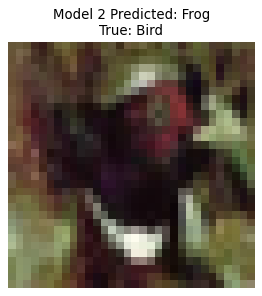

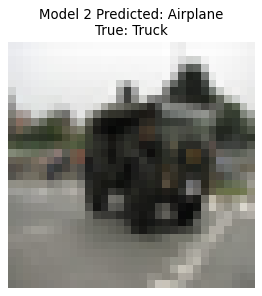

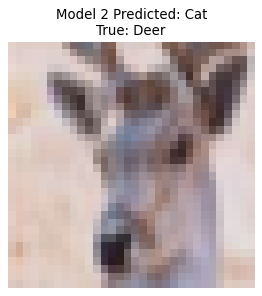

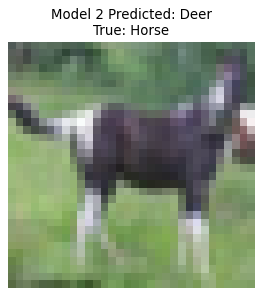

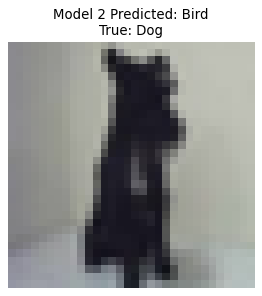

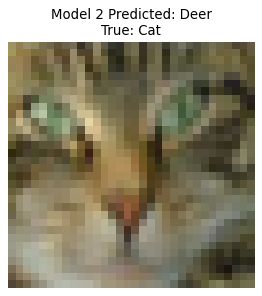

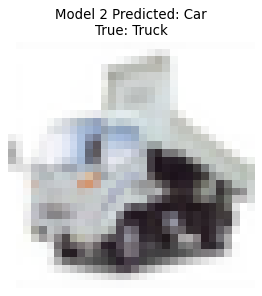

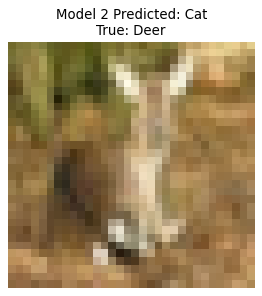

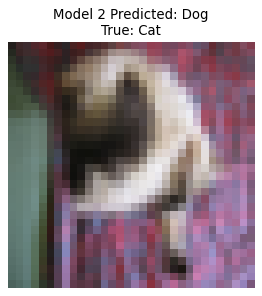

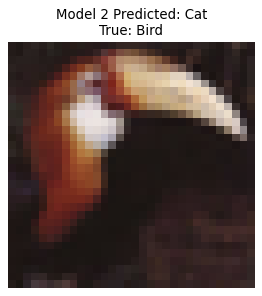

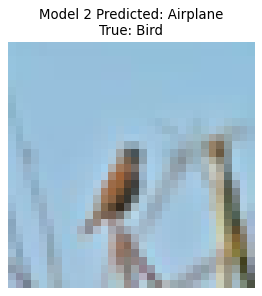

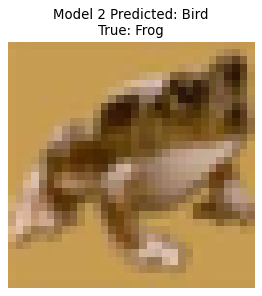

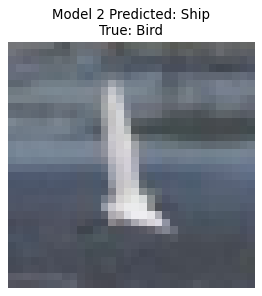

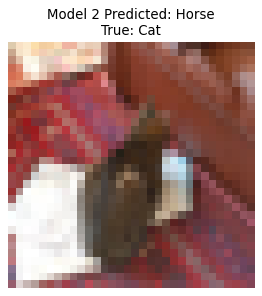

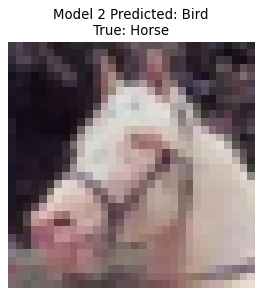

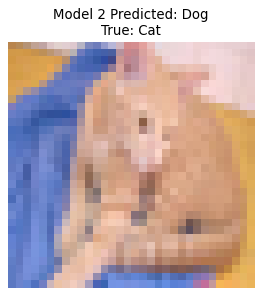

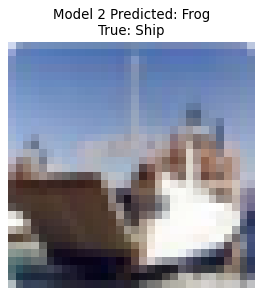

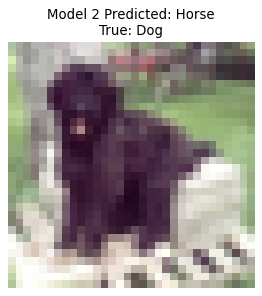

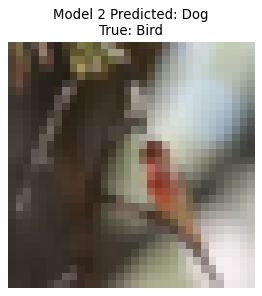

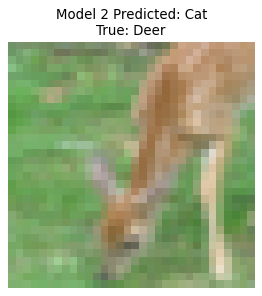

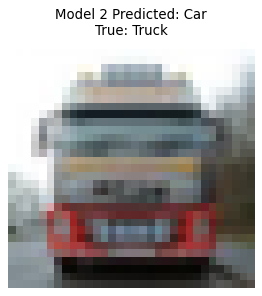

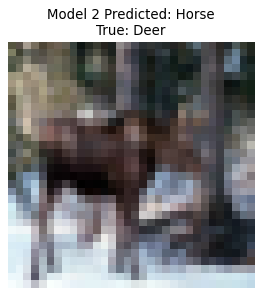

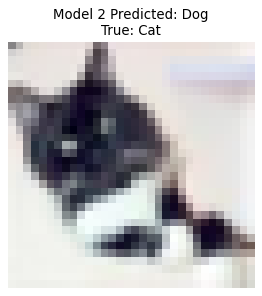

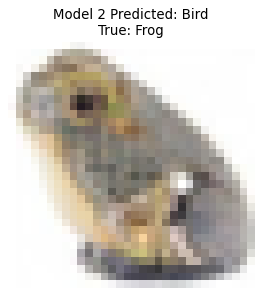

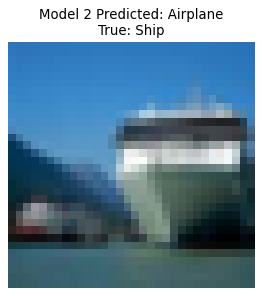

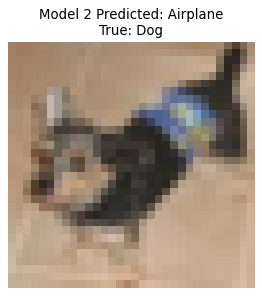

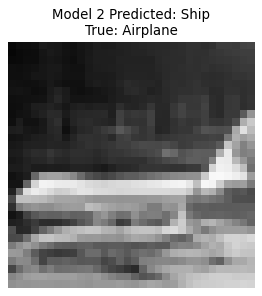

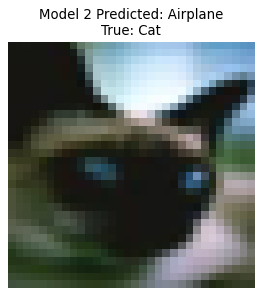

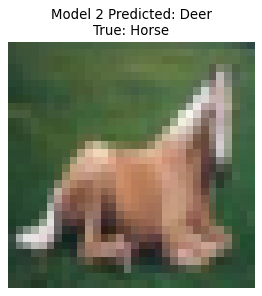

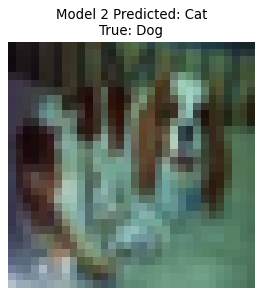

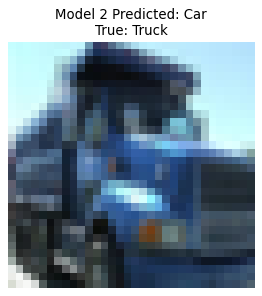

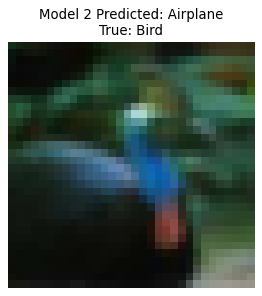

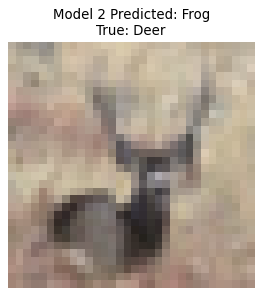

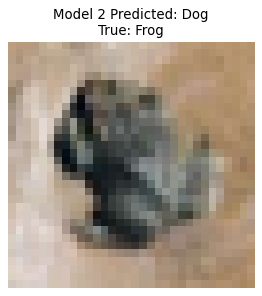

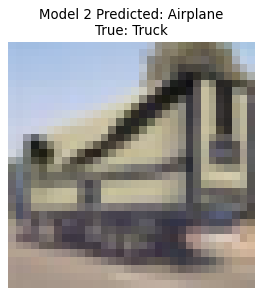

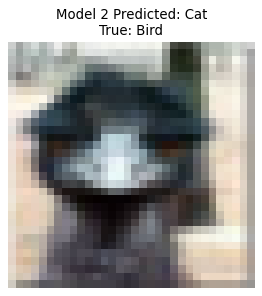

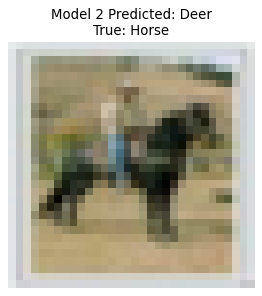

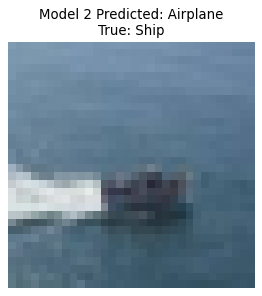

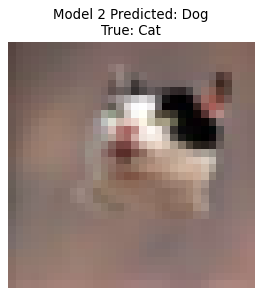

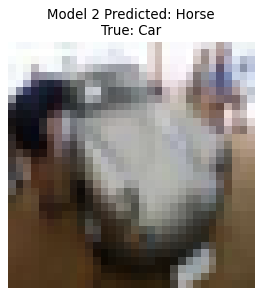

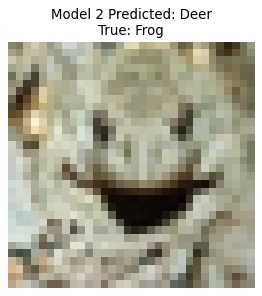

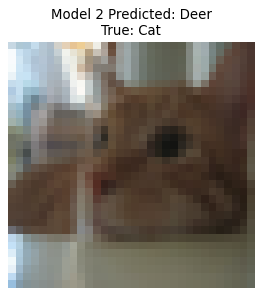

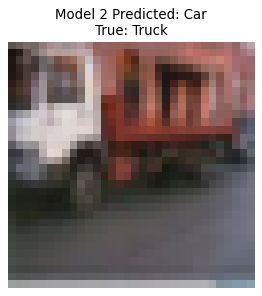

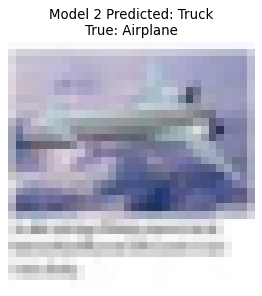

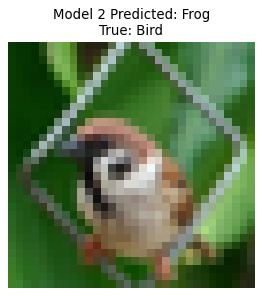

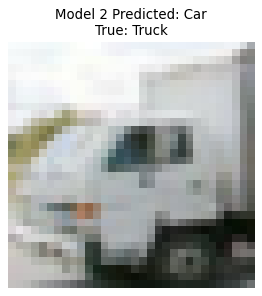

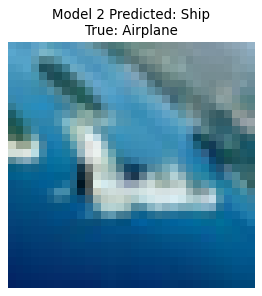

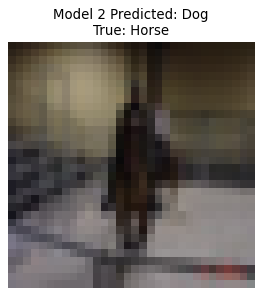

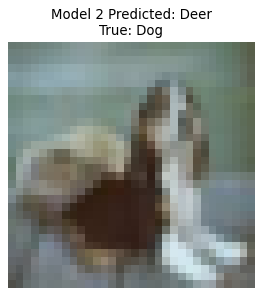

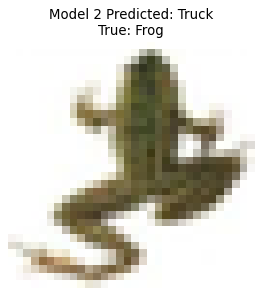

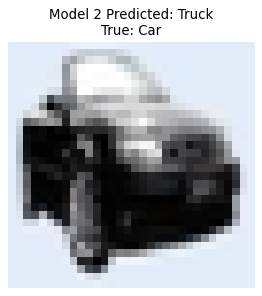

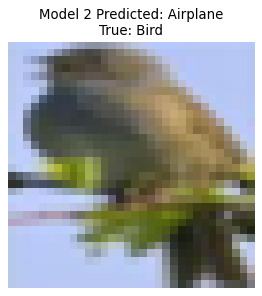

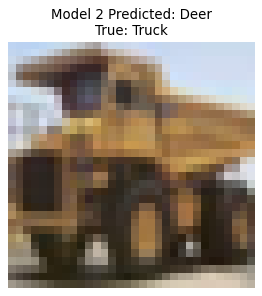

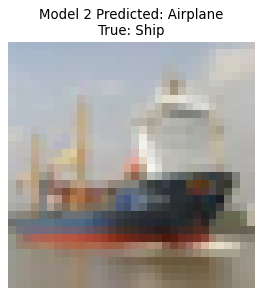

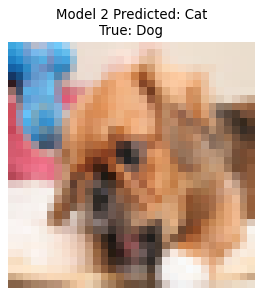

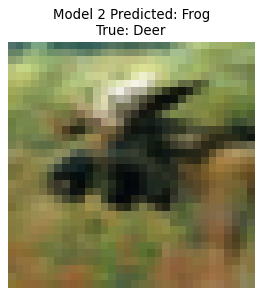

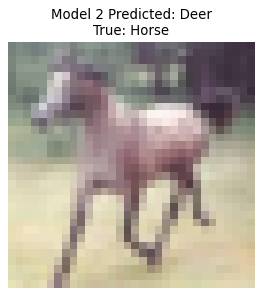

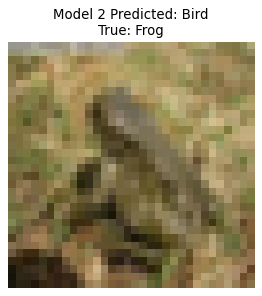

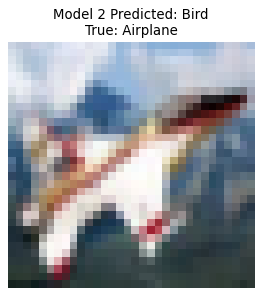

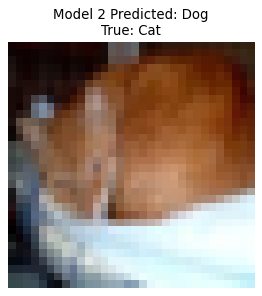

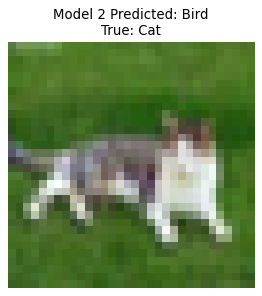

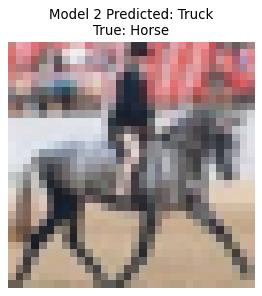

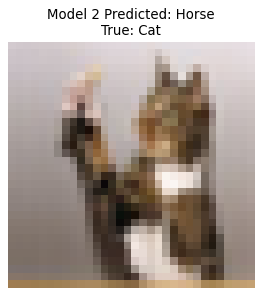

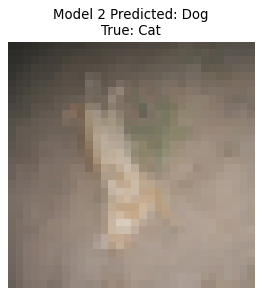

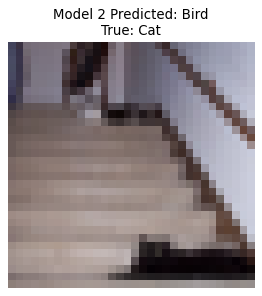

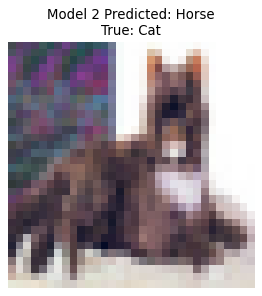

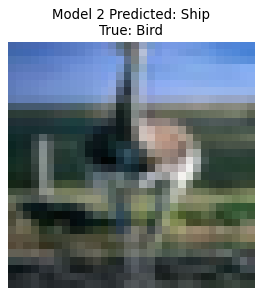

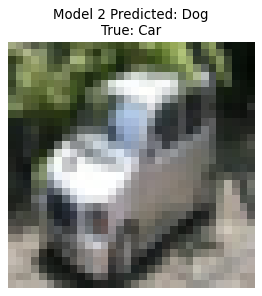

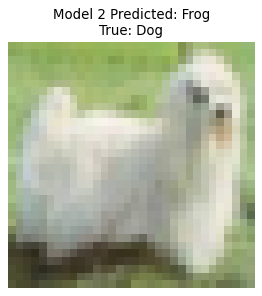

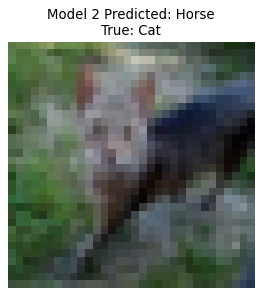

Incorrect predictions on random test data (Model 2): 159/500
Accuracy on random test data (Model 2): 68.20%


In [4]:
import random
import numpy as np
import matplotlib.pyplot as plt

label_mapping = {
    0: "Airplane",
    1: "Car",
    2: "Bird",
    3: "Cat",
    4: "Deer",
    5: "Dog",
    6: "Frog",
    7: "Horse",
    8: "Ship",
    9: "Truck"
}

def predict_and_summarize(model, x_data, y_data, data_type, model_name):
    predictions = model.predict(x_data)
    incorrect_predictions = 0

    for i in range(len(x_data)):
        predicted_class = np.argmax(predictions[i])
        true_class = np.argmax(y_data[i])

        if predicted_class != true_class:
            incorrect_predictions += 1
            plt.figure(figsize=(4, 4), dpi=80)
            plt.imshow(x_data[i])
            predicted_label = label_mapping.get(predicted_class, str(predicted_class))
            true_label = label_mapping.get(true_class, str(true_class))
            plt.title(f'{model_name} Predicted: {predicted_label}\nTrue: {true_label}', fontsize=12)
            plt.axis('off')
            plt.show()

    accuracy = (1 - (incorrect_predictions / len(x_data))) * 100
    print("=========================================================================================")
    print(f"Incorrect predictions on {data_type} data ({model_name}): {incorrect_predictions}/{len(x_data)}")
    print(f"Accuracy on {data_type} data ({model_name}): {accuracy:.2f}%")
    print("=========================================================================================")

# Randomly select 500 samples from the test dataset
random_indices = random.sample(range(len(x_test)), 500)
x_random_test = x_test[random_indices]
y_random_test = y_test[random_indices]

# Predict and summarize model1
predict_and_summarize(model1, x_random_test, y_random_test, "random test", "Model 1")

# Predict and summarize model2
predict_and_summarize(model2, x_random_test, y_random_test, "random test", "Model 2")
